In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import os

os.chdir('/content/drive/MyDrive/Colab Notebooks')

In [ ]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
# plt.style.use('seaborn')

import warnings
warnings.filterwarnings('ignore')

np.set_printoptions(precision=4, suppress=True)

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, BaggingClassifier, AdaBoostClassifier
from xgboost import XGBClassifier
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier

In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn.utils import class_weight

from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, classification_report, recall_score, accuracy_score

In [ ]:
from tensorflow import keras
from tensorflow.keras import layers

In [ ]:
train = pd.read_csv('train.csv')[['Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare', 'Embarked', 'Survived']]
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Pclass    891 non-null    int64  
 1   Sex       891 non-null    object 
 2   Age       714 non-null    float64
 3   SibSp     891 non-null    int64  
 4   Parch     891 non-null    int64  
 5   Fare      891 non-null    float64
 6   Embarked  889 non-null    object 
 7   Survived  891 non-null    int64  
dtypes: float64(2), int64(4), object(2)
memory usage: 55.8+ KB


In [ ]:
test_1 = pd.read_csv('test.csv')[['Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare', 'Embarked']]
test_2 = pd.read_csv('gender_submission.csv')[['Survived']]
test = pd.concat([test_1, test_2], axis = 1)
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Pclass    418 non-null    int64  
 1   Sex       418 non-null    object 
 2   Age       332 non-null    float64
 3   SibSp     418 non-null    int64  
 4   Parch     418 non-null    int64  
 5   Fare      417 non-null    float64
 6   Embarked  418 non-null    object 
 7   Survived  418 non-null    int64  
dtypes: float64(2), int64(4), object(2)
memory usage: 26.2+ KB


In [ ]:
data = pd.concat([train, test], ignore_index=True)
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1309 entries, 0 to 1308
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Pclass    1309 non-null   int64  
 1   Sex       1309 non-null   object 
 2   Age       1046 non-null   float64
 3   SibSp     1309 non-null   int64  
 4   Parch     1309 non-null   int64  
 5   Fare      1308 non-null   float64
 6   Embarked  1307 non-null   object 
 7   Survived  1309 non-null   int64  
dtypes: float64(2), int64(4), object(2)
memory usage: 81.9+ KB


In [ ]:
df1 = data.astype('str')
df2 = pd.get_dummies(df1)

In [ ]:
list(df2.columns)

In [ ]:
df3 = df2.iloc[:891]
df3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Columns: 407 entries, Pclass_1 to Survived_1
dtypes: uint8(407)
memory usage: 354.3 KB


In [ ]:
df4 = df3.sample(frac=1, random_state=100)

for i in range(9):
    df4 = df4.sample(frac=1, random_state=100)

In [ ]:
N = len(df4)
N1 = int(4 * N / 5)

In [ ]:
x_train = df4.iloc[:N1, :-2]
x_train.shape

(712, 405)

In [ ]:
x_val = df4.iloc[N1:, :-2]
x_val.shape

(179, 405)

In [ ]:
x_test = df2.iloc[891:, :-2]
x_test.shape

(418, 405)

In [ ]:
y_train = df4.iloc[:N1, -1]

In [ ]:
y_train.describe()

count    712.000000
mean       0.396067
std        0.489423
min        0.000000
25%        0.000000
50%        0.000000
75%        1.000000
max        1.000000
Name: Survived_1, dtype: float64

In [ ]:
y_val = df4.iloc[N1:, -1]

In [ ]:
y_val.describe()

count    179.000000
mean       0.335196
std        0.473383
min        0.000000
25%        0.000000
50%        0.000000
75%        1.000000
max        1.000000
Name: Survived_1, dtype: float64

In [ ]:
y_test = df2.iloc[891:, -1]

In [ ]:
y_test.describe()

count    418.000000
mean       0.363636
std        0.481622
min        0.000000
25%        0.000000
50%        0.000000
75%        1.000000
max        1.000000
Name: Survived_1, dtype: float64

In [ ]:
sc = StandardScaler()
sc.fit(x_train)

x_train_std = sc.transform(x_train)
x_val_std = sc.transform(x_val)
x_test_std = sc.transform(x_test)

In [ ]:
print('Labels counts in y_train:', np.bincount(y_train))
print('% in y_train:', np.bincount(y_train) / len(y_train))
print()

print('Labels counts in y_val:', np.bincount(y_val))
print('% in y_val:', np.bincount(y_val) / len(y_val))
print()

print('Labels counts in y_test:', np.bincount(y_test))
print('% in y_test:', np.bincount(y_test) / len(y_test))
print()

Labels counts in y_train: [430 282]
% in y_train: [0.6039 0.3961]

Labels counts in y_val: [119  60]
% in y_val: [0.6648 0.3352]

Labels counts in y_test: [266 152]
% in y_test: [0.6364 0.3636]



In [ ]:
target_names = ['Survived', 'Death']

In [ ]:
iterables = [['Logistic', 'KNN', 'GaussianNB', 'DT', 'RF', 'Bagging', 'AdaBoost', 'XGBBoost', 'SVM', 'NN-Scikit', 'NN-TF'], 
             ['Ig_im', 'Ig_im_tun_z', 'Deal_im', 'Deal_im_tun_z']]            
index = pd.MultiIndex.from_product(iterables)

Result = pd.DataFrame(np.zeros((44, 4)), 
                      columns = ['recall_0', 'recall_1', 'recall_sum', 'acc'],
                      index =index)
Result

In [ ]:
zstep = 1

## Logistic

In [ ]:
temp = np.zeros((4, 4))

#### Focus on accuracy

In [ ]:
c1 = []

for i in range(-4, 5):
    model = LogisticRegression(C = 10 ** i, random_state=100)
    model.fit(x_train_std, y_train)
    print(f'The score for C = {10 ** i} is {model.score(x_val_std, y_val):.6f}.')
    c1.append(model.score(x_val_std, y_val))

print()

c2 = np.argmax(c1)
print(f'The proper C is {10 ** (int(c2) - 4)}.')

The score for C = 0.0001 is 0.664804.
The score for C = 0.001 is 0.798883.
The score for C = 0.01 is 0.793296.
The score for C = 0.1 is 0.793296.
The score for C = 1 is 0.793296.
The score for C = 10 is 0.720670.
The score for C = 100 is 0.720670.
The score for C = 1000 is 0.726257.
The score for C = 10000 is 0.726257.

The proper C is 0.001.


In [ ]:
model =  LogisticRegression(C = 10 ** (int(c2) - 4), random_state=100)
model.fit(x_train_std, y_train)

y_pred = model.predict(x_test_std)   

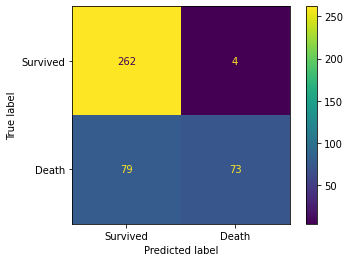

In [ ]:
cm = confusion_matrix(y_test, y_pred)

disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=target_names)
disp.plot();

In [ ]:
print(classification_report(y_test, y_pred, target_names=target_names, digits=3))

              precision    recall  f1-score   support

    Survived      0.768     0.985     0.863       266
       Death      0.948     0.480     0.638       152

    accuracy                          0.801       418
   macro avg      0.858     0.733     0.750       418
weighted avg      0.834     0.801     0.781       418



In [ ]:
temp[0] = [recall_score(y_test, y_pred, average=None)[0], 
           recall_score(y_test, y_pred, average=None)[1],
           recall_score(y_test, y_pred, average=None).sum(),
           accuracy_score(y_test, y_pred)]
temp

array([[0.985 , 0.4803, 1.4652, 0.8014],
       [0.    , 0.    , 0.    , 0.    ],
       [0.    , 0.    , 0.    , 0.    ],
       [0.    , 0.    , 0.    , 0.    ]])

#### Focus on accuracy by tuning z

In [ ]:
c1 = np.zeros((9, 99))

for i in range(-4, 5):
    print('C =', 10 ** i)

    model = LogisticRegression(C = 10 ** i, random_state=100)
    model.fit(x_train_std, y_train)

    for z in range(zstep, 100, zstep):                       
        y_pred = np.where(model.predict_proba(x_val_std)[:, 1] > z / 100, 1, 0) 

        if z % 10 == 0:
            print(f'The score for z = {z / 100:.2f} is {accuracy_score(y_val, y_pred):.6f}.')
            
        c1[i + 4, int((z - zstep) / zstep)] = accuracy_score(y_val, y_pred)
    
    print()

c2 = np.unravel_index(np.argmax(c1), c1.shape)
print(c2)

print(f'The proper C and z are {10 ** (int(c2[0]) - 4)} and {(c2[1] * zstep + zstep) / 100:.2f}.')

C = 0.0001
The score for z = 0.10 is 0.335196.
The score for z = 0.20 is 0.335196.
The score for z = 0.30 is 0.335196.
The score for z = 0.40 is 0.810056.
The score for z = 0.50 is 0.664804.
The score for z = 0.60 is 0.664804.
The score for z = 0.70 is 0.664804.
The score for z = 0.80 is 0.664804.
The score for z = 0.90 is 0.664804.

C = 0.001
The score for z = 0.10 is 0.335196.
The score for z = 0.20 is 0.335196.
The score for z = 0.30 is 0.547486.
The score for z = 0.40 is 0.798883.
The score for z = 0.50 is 0.798883.
The score for z = 0.60 is 0.731844.
The score for z = 0.70 is 0.664804.
The score for z = 0.80 is 0.664804.
The score for z = 0.90 is 0.664804.

C = 0.01
The score for z = 0.10 is 0.441341.
The score for z = 0.20 is 0.614525.
The score for z = 0.30 is 0.748603.
The score for z = 0.40 is 0.798883.
The score for z = 0.50 is 0.793296.
The score for z = 0.60 is 0.798883.
The score for z = 0.70 is 0.782123.
The score for z = 0.80 is 0.759777.
The score for z = 0.90 is 0.7150

In [ ]:
model = LogisticRegression(C = 10 ** (int(c2[0]) - 4), random_state=100)
model.fit(x_train_std, y_train)

y_pred = np.where(model.predict_proba(x_test_std)[:, 1] > (c2[1] * zstep + zstep) / 100, 1, 0) 

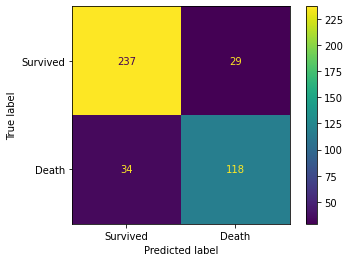

In [ ]:
cm = confusion_matrix(y_test, y_pred)

disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=target_names)
disp.plot();

In [ ]:
print(classification_report(y_test, y_pred, target_names=target_names, digits=3))

              precision    recall  f1-score   support

    Survived      0.875     0.891     0.883       266
       Death      0.803     0.776     0.789       152

    accuracy                          0.849       418
   macro avg      0.839     0.834     0.836       418
weighted avg      0.848     0.849     0.849       418



In [ ]:
temp[1] = [recall_score(y_test, y_pred, average=None)[0], 
           recall_score(y_test, y_pred, average=None)[1],
           recall_score(y_test, y_pred, average=None).sum(),
           accuracy_score(y_test, y_pred)]
temp

array([[0.985 , 0.4803, 1.4652, 0.8014],
       [0.891 , 0.7763, 1.6673, 0.8493],
       [0.8233, 0.8618, 1.6852, 0.8373],
       [0.    , 0.    , 0.    , 0.    ]])

#### Focus on recall

In [ ]:
c1 = []

for i in range(-4, 5):
    model = LogisticRegression(C = 10 ** i, random_state=100, class_weight='balanced')
    model.fit(x_train_std, y_train)
    y_pred = model.predict(x_val_std) 
    recall = recall_score(y_val, y_pred, average=None).sum()
    print(f'The recall for C = {10 ** i} is {recall:.6f}.')
    c1.append(recall)
    
print()

c2 = np.argmax(c1)
print(f'The proper C is {10 ** (int(c2) - 4)}.')

The recall for C = 0.0001 is 1.639916.
The recall for C = 0.001 is 1.631653.
The recall for C = 0.01 is 1.598459.
The recall for C = 0.1 is 1.573529.
The recall for C = 1 is 1.565266.
The recall for C = 10 is 1.389916.
The recall for C = 100 is 1.389776.
The recall for C = 1000 is 1.381653.
The recall for C = 10000 is 1.373249.

The proper C is 0.0001.


In [ ]:
model =  LogisticRegression(C = 10 ** (int(c2) - 4), class_weight='balanced', random_state=100)
model.fit(x_train_std, y_train)

y_pred = model.predict(x_test_std)  

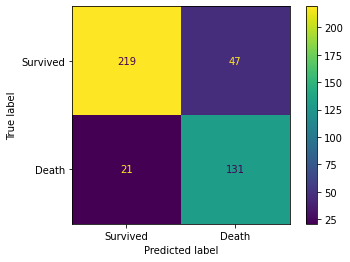

In [ ]:
cm = confusion_matrix(y_test, y_pred)

disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=target_names)
disp.plot();

In [ ]:
print(classification_report(y_test, y_pred, target_names=target_names, digits=3))

              precision    recall  f1-score   support

    Survived      0.912     0.823     0.866       266
       Death      0.736     0.862     0.794       152

    accuracy                          0.837       418
   macro avg      0.824     0.843     0.830       418
weighted avg      0.848     0.837     0.840       418



In [ ]:
temp[2] = [recall_score(y_test, y_pred, average=None)[0], 
           recall_score(y_test, y_pred, average=None)[1],
           recall_score(y_test, y_pred, average=None).sum(),
           accuracy_score(y_test, y_pred)]
temp

array([[0.985 , 0.4803, 1.4652, 0.8014],
       [0.891 , 0.7763, 1.6673, 0.8493],
       [0.8233, 0.8618, 1.6852, 0.8373],
       [0.    , 0.    , 0.    , 0.    ]])

#### Focus on recall by tuning z

In [ ]:
c1 = np.zeros((9, 99))

for i in range(-4, 5):
    print('C =', 10 ** i)

    model = LogisticRegression(C = 10 ** i, random_state=100, class_weight='balanced')
    model.fit(x_train_std, y_train)

    for z in range(zstep, 100, zstep):                       
        y_pred = np.where(model.predict_proba(x_val_std)[:, 1] > z / 100, 1, 0) 
        recall = recall_score(y_val, y_pred, average=None).sum()

        if z % 10 == 0:
            print(f'The recall for z = {z / 100:.2f} is {recall:.6f}.')

        c1[i + 4, int((z - zstep) / zstep)] = recall
    
    print()

c2 = np.unravel_index(np.argmax(c1), c1.shape)
print(c2)

print(f'The proper C and z are {10 ** (int(c2[0]) - 4)} and {(c2[1] * zstep + zstep) / 100:.2f}.')

C = 0.0001
The recall for z = 0.10 is 1.000000.
The recall for z = 0.20 is 1.000000.
The recall for z = 0.30 is 1.000000.
The recall for z = 0.40 is 1.000000.
The recall for z = 0.50 is 1.639916.
The recall for z = 0.60 is 1.000000.
The recall for z = 0.70 is 1.000000.
The recall for z = 0.80 is 1.000000.
The recall for z = 0.90 is 1.000000.

C = 0.001
The recall for z = 0.10 is 1.000000.
The recall for z = 0.20 is 1.000000.
The recall for z = 0.30 is 1.000000.
The recall for z = 0.40 is 1.370308.
The recall for z = 0.50 is 1.631653.
The recall for z = 0.60 is 1.391457.
The recall for z = 0.70 is 1.116667.
The recall for z = 0.80 is 1.000000.
The recall for z = 0.90 is 1.000000.

C = 0.01
The recall for z = 0.10 is 1.058824.
The recall for z = 0.20 is 1.311625.
The recall for z = 0.30 is 1.463025.
The recall for z = 0.40 is 1.564286.
The recall for z = 0.50 is 1.598459.
The recall for z = 0.60 is 1.548599.
The recall for z = 0.70 is 1.441036.
The recall for z = 0.80 is 1.316527.
The re

In [ ]:
model = LogisticRegression(C = 10 ** (int(c2[0]) - 4), random_state=100, class_weight='balanced')
model.fit(x_train_std, y_train)

y_pred = np.where(model.predict_proba(x_test_std)[:, 1] > (c2[1] * zstep + zstep) / 100, 1, 0) 

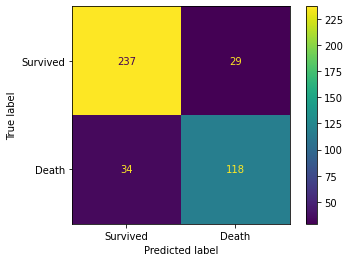

In [ ]:
cm = confusion_matrix(y_test, y_pred)

disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=target_names)
disp.plot();

In [ ]:
print(classification_report(y_test, y_pred, target_names=target_names, digits=3))

              precision    recall  f1-score   support

    Survived      0.875     0.891     0.883       266
       Death      0.803     0.776     0.789       152

    accuracy                          0.849       418
   macro avg      0.839     0.834     0.836       418
weighted avg      0.848     0.849     0.849       418



In [ ]:
temp[3] = [recall_score(y_test, y_pred, average=None)[0], 
           recall_score(y_test, y_pred, average=None)[1],
           recall_score(y_test, y_pred, average=None).sum(),
           accuracy_score(y_test, y_pred)]
temp

array([[0.985 , 0.4803, 1.4652, 0.8014],
       [0.891 , 0.7763, 1.6673, 0.8493],
       [0.8233, 0.8618, 1.6852, 0.8373],
       [0.891 , 0.7763, 1.6673, 0.8493]])

In [ ]:
Result.loc['Logistic'] = temp
Result

recall_0  recall_1  recall_sum       acc
Logistic   Ig_im          0.984962  0.480263    1.465226  0.801435
           Ig_im_tun_z    0.890977  0.776316    1.667293  0.849282
           Deal_im        0.823308  0.861842    1.685150  0.837321
           Deal_im_tun_z  0.890977  0.776316    1.667293  0.849282
KNN        Ig_im          0.000000  0.000000    0.000000  0.000000
           Ig_im_tun_z    0.000000  0.000000    0.000000  0.000000
           Deal_im        0.000000  0.000000    0.000000  0.000000
           Deal_im_tun_z  0.000000  0.000000    0.000000  0.000000
GaussianNB Ig_im          0.000000  0.000000    0.000000  0.000000
           Ig_im_tun_z    0.000000  0.000000    0.000000  0.000000
           Deal_im        0.000000  0.000000    0.000000  0.000000
           Deal_im_tun_z  0.000000  0.000000    0.000000  0.000000
DT         Ig_im          0.000000  0.000000    0.000000  0.000000
           Ig_im_tun_z    0.000000  0.000000    0.000000  0.000000
           Deal_im        0.000000  0.000000    0.000000  0.000000
           Deal_im_tun_z  0.000000  0.000000    0.000000  0.000000
RF         Ig_im          0.000000  0.000000    0.000000  0.000000
           Ig_im_tun_z    0.000000  0.000000    0.000000  0.000000
           Deal_im        0.000000  0.000000    0.000000  0.000000
           Deal_im_tun_z  0.000000  0.000000    0.000000  0.000000
Bagging    Ig_im          0.000000  0.000000    0.000000  0.000000
           Ig_im_tun_z    0.000000  0.000000    0.000000  0.000000
           Deal_im        0.000000  0.000000    0.000000  0.000000
           Deal_im_tun_z  0.000000  0.000000    0.000000  0.000000
AdaBoost   Ig_im          0.000000  0.000000    0.000000  0.000000
           Ig_im_tun_z    0.000000  0.000000    0.000000  0.000000
           Deal_im        0.000000  0.000000    0.000000  0.000000
           Deal_im_tun_z  0.000000  0.000000    0.000000  0.000000
XGBBoost   Ig_im          0.000000  0.000000    0.000000  0.000000
           Ig_im_tun_z    0.000000  0.000000    0.000000  0.000000
           Deal_im        0.000000  0.000000    0.000000  0.000000
           Deal_im_tun_z  0.000000  0.000000    0.000000  0.000000
SVM        Ig_im          0.000000  0.000000    0.000000  0.000000
           Ig_im_tun_z    0.000000  0.000000    0.000000  0.000000
           Deal_im        0.000000  0.000000    0.000000  0.000000
           Deal_im_tun_z  0.000000  0.000000    0.000000  0.000000
NN-Scikit  Ig_im          0.000000  0.000000    0.000000  0.000000
           Ig_im_tun_z    0.000000  0.000000    0.000000  0.000000
           Deal_im        0.000000  0.000000    0.000000  0.000000
           Deal_im_tun_z  0.000000  0.000000    0.000000  0.000000
NN-TF      Ig_im          0.000000  0.000000    0.000000  0.000000
           Ig_im_tun_z    0.000000  0.000000    0.000000  0.000000
           Deal_im        0.000000  0.000000    0.000000  0.000000
           Deal_im_tun_z  0.000000  0.000000    0.000000  0.000000

## KNN

In [ ]:
temp = np.zeros((4, 4))

#### Focus on accuracy

In [ ]:
c1 = []

for i in range(1, 11):
    model = KNeighborsClassifier(n_neighbors = i)
    model.fit(x_train_std, y_train)
    print(f'The score for number of neighbors {i} is {model.score(x_val_std, y_val):.6f}.')
    c1.append(model.score(x_val_std, y_val))

print()

c2 = np.argmax(c1)
print(f'The proper number of neighbors is {c2 + 1}.')

The score for number of neighbors 1 is 0.664804.
The score for number of neighbors 2 is 0.687151.
The score for number of neighbors 3 is 0.681564.
The score for number of neighbors 4 is 0.681564.
The score for number of neighbors 5 is 0.675978.
The score for number of neighbors 6 is 0.659218.
The score for number of neighbors 7 is 0.664804.
The score for number of neighbors 8 is 0.670391.
The score for number of neighbors 9 is 0.675978.
The score for number of neighbors 10 is 0.670391.

The proper number of neighbors is 2.


In [ ]:
model = KNeighborsClassifier(n_neighbors = c2 + 1)
model.fit(x_train_std, y_train)

y_pred = model.predict(x_test_std)   

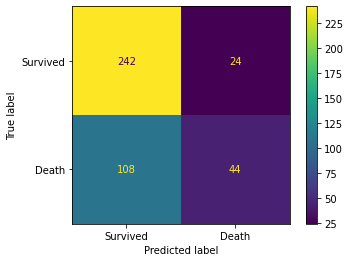

In [ ]:
cm = confusion_matrix(y_test, y_pred)

disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=target_names)
disp.plot();

In [ ]:
print(classification_report(y_test, y_pred, target_names=target_names, digits=3))

              precision    recall  f1-score   support

    Survived      0.691     0.910     0.786       266
       Death      0.647     0.289     0.400       152

    accuracy                          0.684       418
   macro avg      0.669     0.600     0.593       418
weighted avg      0.675     0.684     0.645       418



In [ ]:
temp[0] = [recall_score(y_test, y_pred, average=None)[0], 
           recall_score(y_test, y_pred, average=None)[1],
           recall_score(y_test, y_pred, average=None).sum(),
           accuracy_score(y_test, y_pred)]
temp

array([[0.9098, 0.2895, 1.1992, 0.6842],
       [0.    , 0.    , 0.    , 0.    ],
       [0.    , 0.    , 0.    , 0.    ],
       [0.    , 0.    , 0.    , 0.    ]])

#### Focus on accuracy by tuning z

In [ ]:
c1 = np.zeros((10, 99))

for i in range(1, 11):
    print('The number of neighbors =', i)

    model = KNeighborsClassifier(n_neighbors=i)
    model.fit(x_train_std, y_train)

    for z in range(zstep, 100, zstep):                       
        y_pred = np.where(model.predict_proba(x_val_std)[:, 1] > z / 100, 1, 0) 

        if z % 10 == 0:
            print(f'The score for z = {z / 100:.2f} is {accuracy_score(y_val, y_pred):.6f}.')

        c1[i - 1, int((z - zstep) / zstep)] = accuracy_score(y_val, y_pred)
    
    print()

c2 = np.unravel_index(np.argmax(c1), c1.shape)
print(c2)

print(f'The proper number of neighbors and z are {c2[0] + 1} and {(c2[1] * zstep + zstep) / 100:.2f}.')

The number of neighbors = 1
The score for z = 0.10 is 0.664804.
The score for z = 0.20 is 0.664804.
The score for z = 0.30 is 0.664804.
The score for z = 0.40 is 0.664804.
The score for z = 0.50 is 0.664804.
The score for z = 0.60 is 0.664804.
The score for z = 0.70 is 0.664804.
The score for z = 0.80 is 0.664804.
The score for z = 0.90 is 0.664804.

The number of neighbors = 2
The score for z = 0.10 is 0.636872.
The score for z = 0.20 is 0.636872.
The score for z = 0.30 is 0.636872.
The score for z = 0.40 is 0.636872.
The score for z = 0.50 is 0.687151.
The score for z = 0.60 is 0.687151.
The score for z = 0.70 is 0.687151.
The score for z = 0.80 is 0.687151.
The score for z = 0.90 is 0.687151.

The number of neighbors = 3
The score for z = 0.10 is 0.558659.
The score for z = 0.20 is 0.558659.
The score for z = 0.30 is 0.558659.
The score for z = 0.40 is 0.681564.
The score for z = 0.50 is 0.681564.
The score for z = 0.60 is 0.681564.
The score for z = 0.70 is 0.670391.
The score for 

In [ ]:
model = KNeighborsClassifier(n_neighbors = c2[0] + 1)
model.fit(x_train_std, y_train)

y_pred = np.where(model.predict_proba(x_test_std)[:, 1] > (c2[1] * zstep + zstep) / 100, 1, 0)  

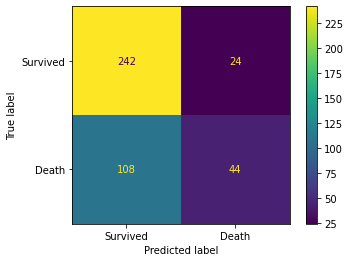

In [ ]:
cm = confusion_matrix(y_test, y_pred)

disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=target_names)
disp.plot();

In [ ]:
print(classification_report(y_test, y_pred, target_names=target_names, digits=3))

              precision    recall  f1-score   support

    Survived      0.691     0.910     0.786       266
       Death      0.647     0.289     0.400       152

    accuracy                          0.684       418
   macro avg      0.669     0.600     0.593       418
weighted avg      0.675     0.684     0.645       418



In [ ]:
temp[1] = [recall_score(y_test, y_pred, average=None)[0], 
           recall_score(y_test, y_pred, average=None)[1],
           recall_score(y_test, y_pred, average=None).sum(),
           accuracy_score(y_test, y_pred)]
temp

array([[0.9098, 0.2895, 1.1992, 0.6842],
       [0.9098, 0.2895, 1.1992, 0.6842],
       [0.    , 0.    , 0.    , 0.    ],
       [0.    , 0.    , 0.    , 0.    ]])

#### Focus on recall

In [ ]:
c1 = []

for i in range(1, 11):
    model = KNeighborsClassifier(n_neighbors = i)
    model.fit(x_train_std, y_train)
    y_pred = model.predict(x_val_std) 
    recall = recall_score(y_val, y_pred, average=None).sum()
    print(f'The recall for number of neighbors {i} is {recall:.6f}.')
    c1.append(recall)

print()

c2 = np.argmax(c1)
print(f'The proper number of neighbors is {c2 + 1}.')

The recall for number of neighbors 1 is 1.314006.
The recall for number of neighbors 2 is 1.207143.
The recall for number of neighbors 3 is 1.264846.
The recall for number of neighbors 4 is 1.165686.
The recall for number of neighbors 5 is 1.190336.
The recall for number of neighbors 6 is 1.074230.
The recall for number of neighbors 7 is 1.115686.
The recall for number of neighbors 8 is 1.091036.
The recall for number of neighbors 9 is 1.115966.
The recall for number of neighbors 10 is 1.082773.

The proper number of neighbors is 1.


In [ ]:
model = KNeighborsClassifier(n_neighbors = c2 + 1)
model.fit(x_train_std, y_train)

y_pred = model.predict(x_test_std)   

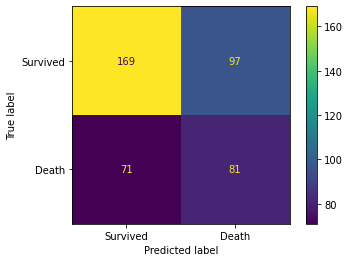

In [ ]:
cm = confusion_matrix(y_test, y_pred)

disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=target_names)
disp.plot();

In [ ]:
print(classification_report(y_test, y_pred, target_names=target_names, digits=3))

              precision    recall  f1-score   support

    Survived      0.704     0.635     0.668       266
       Death      0.455     0.533     0.491       152

    accuracy                          0.598       418
   macro avg      0.580     0.584     0.579       418
weighted avg      0.614     0.598     0.604       418



In [ ]:
temp[2] = [recall_score(y_test, y_pred, average=None)[0], 
           recall_score(y_test, y_pred, average=None)[1],
           recall_score(y_test, y_pred, average=None).sum(),
           accuracy_score(y_test, y_pred)]
temp

array([[0.9098, 0.2895, 1.1992, 0.6842],
       [0.9098, 0.2895, 1.1992, 0.6842],
       [0.6353, 0.5329, 1.1682, 0.5981],
       [0.    , 0.    , 0.    , 0.    ]])

#### Focus on recall by tuning z

In [ ]:
c1 = np.zeros((10, 99))

for i in range(1, 11):
    print('The number of neighbors =', i)

    model = KNeighborsClassifier(n_neighbors=i)
    model.fit(x_train_std, y_train)

    for z in range(zstep, 100, zstep):                       
        y_pred = np.where(model.predict_proba(x_val_std)[:, 1] > z / 100, 1, 0) 
        recall = recall_score(y_val, y_pred, average=None).sum()

        if z % 10 == 0:
            print(f'The recall for z = {z / 100:.2f} is {recall:.6f}.')
            
        c1[i - 1, int((z - zstep) / zstep)] = recall
    
    print()

c2 = np.unravel_index(np.argmax(c1), c1.shape)
print(c2)

print(f'The proper number of neighbors and z are {c2[0] + 1} and {(c2[1] * zstep + zstep) / 100:.2f}.')

The number of neighbors = 1
The recall for z = 0.10 is 1.314006.
The recall for z = 0.20 is 1.314006.
The recall for z = 0.30 is 1.314006.
The recall for z = 0.40 is 1.314006.
The recall for z = 0.50 is 1.314006.
The recall for z = 0.60 is 1.314006.
The recall for z = 0.70 is 1.314006.
The recall for z = 0.80 is 1.314006.
The recall for z = 0.90 is 1.314006.

The number of neighbors = 2
The recall for z = 0.10 is 1.338095.
The recall for z = 0.20 is 1.338095.
The recall for z = 0.30 is 1.338095.
The recall for z = 0.40 is 1.338095.
The recall for z = 0.50 is 1.207143.
The recall for z = 0.60 is 1.207143.
The recall for z = 0.70 is 1.207143.
The recall for z = 0.80 is 1.207143.
The recall for z = 0.90 is 1.207143.

The number of neighbors = 3
The recall for z = 0.10 is 1.245238.
The recall for z = 0.20 is 1.245238.
The recall for z = 0.30 is 1.245238.
The recall for z = 0.40 is 1.264846.
The recall for z = 0.50 is 1.264846.
The recall for z = 0.60 is 1.264846.
The recall for z = 0.70 is

In [ ]:
model = KNeighborsClassifier(n_neighbors = (c2[0] + 1))
model.fit(x_train_std, y_train)

y_pred = np.where(model.predict_proba(x_test_std)[:, 1] > (c2[1] * zstep + zstep) / 100, 1, 0) 

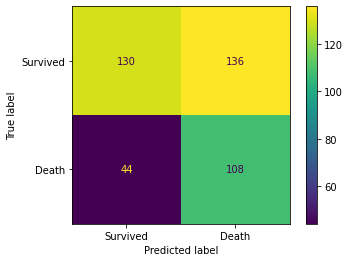

In [ ]:
cm = confusion_matrix(y_test, y_pred)

disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=target_names)
disp.plot();

In [ ]:
print(classification_report(y_test, y_pred, target_names=target_names, digits=3))

              precision    recall  f1-score   support

    Survived      0.747     0.489     0.591       266
       Death      0.443     0.711     0.545       152

    accuracy                          0.569       418
   macro avg      0.595     0.600     0.568       418
weighted avg      0.636     0.569     0.574       418



In [ ]:
temp[3] = [recall_score(y_test, y_pred, average=None)[0], 
           recall_score(y_test, y_pred, average=None)[1],
           recall_score(y_test, y_pred, average=None).sum(),
           accuracy_score(y_test, y_pred)]
temp

array([[0.9098, 0.2895, 1.1992, 0.6842],
       [0.9098, 0.2895, 1.1992, 0.6842],
       [0.6353, 0.5329, 1.1682, 0.5981],
       [0.4887, 0.7105, 1.1992, 0.5694]])

In [ ]:
Result.loc['KNN'] = temp
Result

recall_0  recall_1  recall_sum       acc
Logistic   Ig_im          0.984962  0.480263    1.465226  0.801435
           Ig_im_tun_z    0.890977  0.776316    1.667293  0.849282
           Deal_im        0.823308  0.861842    1.685150  0.837321
           Deal_im_tun_z  0.890977  0.776316    1.667293  0.849282
KNN        Ig_im          0.909774  0.289474    1.199248  0.684211
           Ig_im_tun_z    0.909774  0.289474    1.199248  0.684211
           Deal_im        0.635338  0.532895    1.168233  0.598086
           Deal_im_tun_z  0.488722  0.710526    1.199248  0.569378
GaussianNB Ig_im          0.000000  0.000000    0.000000  0.000000
           Ig_im_tun_z    0.000000  0.000000    0.000000  0.000000
           Deal_im        0.000000  0.000000    0.000000  0.000000
           Deal_im_tun_z  0.000000  0.000000    0.000000  0.000000
DT         Ig_im          0.000000  0.000000    0.000000  0.000000
           Ig_im_tun_z    0.000000  0.000000    0.000000  0.000000
           Deal_im        0.000000  0.000000    0.000000  0.000000
           Deal_im_tun_z  0.000000  0.000000    0.000000  0.000000
RF         Ig_im          0.000000  0.000000    0.000000  0.000000
           Ig_im_tun_z    0.000000  0.000000    0.000000  0.000000
           Deal_im        0.000000  0.000000    0.000000  0.000000
           Deal_im_tun_z  0.000000  0.000000    0.000000  0.000000
Bagging    Ig_im          0.000000  0.000000    0.000000  0.000000
           Ig_im_tun_z    0.000000  0.000000    0.000000  0.000000
           Deal_im        0.000000  0.000000    0.000000  0.000000
           Deal_im_tun_z  0.000000  0.000000    0.000000  0.000000
AdaBoost   Ig_im          0.000000  0.000000    0.000000  0.000000
           Ig_im_tun_z    0.000000  0.000000    0.000000  0.000000
           Deal_im        0.000000  0.000000    0.000000  0.000000
           Deal_im_tun_z  0.000000  0.000000    0.000000  0.000000
XGBBoost   Ig_im          0.000000  0.000000    0.000000  0.000000
           Ig_im_tun_z    0.000000  0.000000    0.000000  0.000000
           Deal_im        0.000000  0.000000    0.000000  0.000000
           Deal_im_tun_z  0.000000  0.000000    0.000000  0.000000
SVM        Ig_im          0.000000  0.000000    0.000000  0.000000
           Ig_im_tun_z    0.000000  0.000000    0.000000  0.000000
           Deal_im        0.000000  0.000000    0.000000  0.000000
           Deal_im_tun_z  0.000000  0.000000    0.000000  0.000000
NN-Scikit  Ig_im          0.000000  0.000000    0.000000  0.000000
           Ig_im_tun_z    0.000000  0.000000    0.000000  0.000000
           Deal_im        0.000000  0.000000    0.000000  0.000000
           Deal_im_tun_z  0.000000  0.000000    0.000000  0.000000
NN-TF      Ig_im          0.000000  0.000000    0.000000  0.000000
           Ig_im_tun_z    0.000000  0.000000    0.000000  0.000000
           Deal_im        0.000000  0.000000    0.000000  0.000000
           Deal_im_tun_z  0.000000  0.000000    0.000000  0.000000

## GaussianNB

In [ ]:
temp = np.zeros((4, 4))

#### Focus on accuracy

In [ ]:
model = GaussianNB()
model.fit(x_train_std, y_train)
    
y_pred = model.predict(x_val_std) 

print(f'The score for validation data is {model.score(x_val_std, y_val):.6f}.')

The score for validation data is 0.458101.


In [ ]:
y_pred = model.predict(x_test_std) 

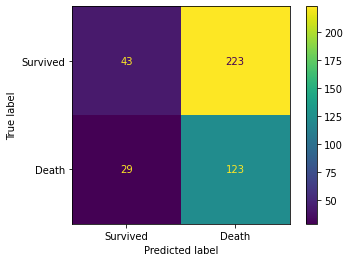

In [ ]:
cm = confusion_matrix(y_test, y_pred)

disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=target_names)
disp.plot();

In [ ]:
print(classification_report(y_test, y_pred, target_names=target_names, digits=3))

              precision    recall  f1-score   support

    Survived      0.597     0.162     0.254       266
       Death      0.355     0.809     0.494       152

    accuracy                          0.397       418
   macro avg      0.476     0.485     0.374       418
weighted avg      0.509     0.397     0.342       418



In [ ]:
temp[0] = [recall_score(y_test, y_pred, average=None)[0], 
           recall_score(y_test, y_pred, average=None)[1],
           recall_score(y_test, y_pred, average=None).sum(),
           accuracy_score(y_test, y_pred)]
temp

array([[0.1617, 0.8092, 0.9709, 0.3971],
       [0.    , 0.    , 0.    , 0.    ],
       [0.    , 0.    , 0.    , 0.    ],
       [0.    , 0.    , 0.    , 0.    ]])

#### Focus on accuracy by tuning z

In [ ]:
c1 = []

model =  GaussianNB()
model.fit(x_train_std, y_train)

for z in range(zstep, 100, zstep):                    
    y_pred = np.where(model.predict_proba(x_val_std)[:, 1] > z / 100, 1, 0) 

    if z % 10 == 0:
        print(f'The score for z = {z / 100:.2f} is {accuracy_score(y_val, y_pred):.6f}.')
    c1.append(accuracy_score(y_val, y_pred))
    
print()

c2 = np.argmax(c1)
print(f'The proper z is {(c2 * zstep + zstep) / 100}.')

The score for z = 0.10 is 0.458101.
The score for z = 0.20 is 0.458101.
The score for z = 0.30 is 0.458101.
The score for z = 0.40 is 0.458101.
The score for z = 0.50 is 0.458101.
The score for z = 0.60 is 0.458101.
The score for z = 0.70 is 0.458101.
The score for z = 0.80 is 0.458101.
The score for z = 0.90 is 0.458101.

The proper z is 0.01.


In [ ]:
y_pred = np.where(model.predict_proba(x_test_std)[:, 1] > (c2 * zstep + zstep) / 100, 1, 0) 

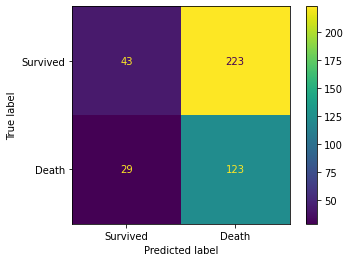

In [ ]:
cm = confusion_matrix(y_test, y_pred)

disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=target_names)
disp.plot();

In [ ]:
print(classification_report(y_test, y_pred, target_names=target_names, digits=3))

              precision    recall  f1-score   support

    Survived      0.597     0.162     0.254       266
       Death      0.355     0.809     0.494       152

    accuracy                          0.397       418
   macro avg      0.476     0.485     0.374       418
weighted avg      0.509     0.397     0.342       418



In [ ]:
temp[1] = [recall_score(y_test, y_pred, average=None)[0], 
           recall_score(y_test, y_pred, average=None)[1],
           recall_score(y_test, y_pred, average=None).sum(),
           accuracy_score(y_test, y_pred)]
temp

array([[0.1617, 0.8092, 0.9709, 0.3971],
       [0.1617, 0.8092, 0.9709, 0.3971],
       [0.    , 0.    , 0.    , 0.    ],
       [0.    , 0.    , 0.    , 0.    ]])

#### Focus on recall

In [ ]:
model = GaussianNB(priors = [0.5, 0.5])
model.fit(x_train_std, y_train)
    
y_pred = model.predict(x_val_std) 

print(f'The score for validation data is {model.score(x_val_std, y_val):.6f}.')

The score for validation data is 0.458101.


In [ ]:
y_pred = model.predict(x_test_std) 

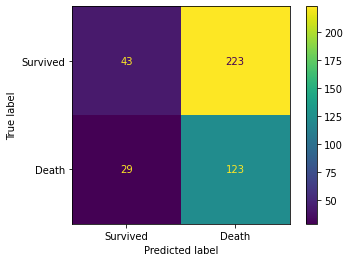

In [ ]:
cm = confusion_matrix(y_test, y_pred)

disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=target_names)
disp.plot();

In [ ]:
print(classification_report(y_test, y_pred, target_names=target_names, digits=3))

              precision    recall  f1-score   support

    Survived      0.597     0.162     0.254       266
       Death      0.355     0.809     0.494       152

    accuracy                          0.397       418
   macro avg      0.476     0.485     0.374       418
weighted avg      0.509     0.397     0.342       418



In [ ]:
temp[2] = [recall_score(y_test, y_pred, average=None)[0], 
           recall_score(y_test, y_pred, average=None)[1],
           recall_score(y_test, y_pred, average=None).sum(),
           accuracy_score(y_test, y_pred)]
temp

array([[0.1617, 0.8092, 0.9709, 0.3971],
       [0.1617, 0.8092, 0.9709, 0.3971],
       [0.1617, 0.8092, 0.9709, 0.3971],
       [0.    , 0.    , 0.    , 0.    ]])

#### Focus on recall by tuning z

In [ ]:
c1 = []

model =  GaussianNB(priors = [0.5, 0.5])
model.fit(x_train_std, y_train)

for z in range(zstep, 100, zstep):                    
    y_pred = np.where(model.predict_proba(x_val_std)[:, 1] > z / 100, 1, 0) 
    recall = recall_score(y_val, y_pred, average=None).sum()

    if z % 10 == 0:
        print(f'The recall for z = {z / 100:.2f} is {recall:.6f}.')
        
    c1.append(recall)
    
print()

c2 = np.argmax(c1)
print(f'The proper z is {(c2 * zstep + zstep) / 100}.')

The recall for z = 0.10 is 1.143557.
The recall for z = 0.20 is 1.143557.
The recall for z = 0.30 is 1.143557.
The recall for z = 0.40 is 1.143557.
The recall for z = 0.50 is 1.143557.
The recall for z = 0.60 is 1.143557.
The recall for z = 0.70 is 1.143557.
The recall for z = 0.80 is 1.143557.
The recall for z = 0.90 is 1.143557.

The proper z is 0.01.


In [ ]:
y_pred = np.where(model.predict_proba(x_test_std)[:, 1] > (c2 * zstep + zstep) / 100, 1, 0) 

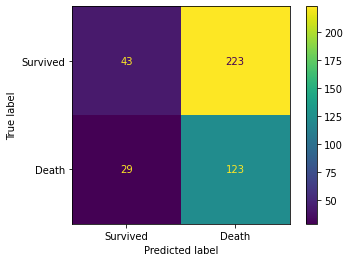

In [ ]:
cm = confusion_matrix(y_test, y_pred)

disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=target_names)
disp.plot();

In [ ]:
print(classification_report(y_test, y_pred, target_names=target_names, digits=3))

              precision    recall  f1-score   support

    Survived      0.597     0.162     0.254       266
       Death      0.355     0.809     0.494       152

    accuracy                          0.397       418
   macro avg      0.476     0.485     0.374       418
weighted avg      0.509     0.397     0.342       418



In [ ]:
temp[3] = [recall_score(y_test, y_pred, average=None)[0], 
           recall_score(y_test, y_pred, average=None)[1],
           recall_score(y_test, y_pred, average=None).sum(),
           accuracy_score(y_test, y_pred)]
temp

array([[0.1617, 0.8092, 0.9709, 0.3971],
       [0.1617, 0.8092, 0.9709, 0.3971],
       [0.1617, 0.8092, 0.9709, 0.3971],
       [0.1617, 0.8092, 0.9709, 0.3971]])

In [ ]:
Result.loc['GaussianNB'] = temp
Result

recall_0  recall_1  recall_sum       acc
Logistic   Ig_im          0.984962  0.480263    1.465226  0.801435
           Ig_im_tun_z    0.890977  0.776316    1.667293  0.849282
           Deal_im        0.823308  0.861842    1.685150  0.837321
           Deal_im_tun_z  0.890977  0.776316    1.667293  0.849282
KNN        Ig_im          0.909774  0.289474    1.199248  0.684211
           Ig_im_tun_z    0.909774  0.289474    1.199248  0.684211
           Deal_im        0.635338  0.532895    1.168233  0.598086
           Deal_im_tun_z  0.488722  0.710526    1.199248  0.569378
GaussianNB Ig_im          0.161654  0.809211    0.970865  0.397129
           Ig_im_tun_z    0.161654  0.809211    0.970865  0.397129
           Deal_im        0.161654  0.809211    0.970865  0.397129
           Deal_im_tun_z  0.161654  0.809211    0.970865  0.397129
DT         Ig_im          0.000000  0.000000    0.000000  0.000000
           Ig_im_tun_z    0.000000  0.000000    0.000000  0.000000
           Deal_im        0.000000  0.000000    0.000000  0.000000
           Deal_im_tun_z  0.000000  0.000000    0.000000  0.000000
RF         Ig_im          0.000000  0.000000    0.000000  0.000000
           Ig_im_tun_z    0.000000  0.000000    0.000000  0.000000
           Deal_im        0.000000  0.000000    0.000000  0.000000
           Deal_im_tun_z  0.000000  0.000000    0.000000  0.000000
Bagging    Ig_im          0.000000  0.000000    0.000000  0.000000
           Ig_im_tun_z    0.000000  0.000000    0.000000  0.000000
           Deal_im        0.000000  0.000000    0.000000  0.000000
           Deal_im_tun_z  0.000000  0.000000    0.000000  0.000000
AdaBoost   Ig_im          0.000000  0.000000    0.000000  0.000000
           Ig_im_tun_z    0.000000  0.000000    0.000000  0.000000
           Deal_im        0.000000  0.000000    0.000000  0.000000
           Deal_im_tun_z  0.000000  0.000000    0.000000  0.000000
XGBBoost   Ig_im          0.000000  0.000000    0.000000  0.000000
           Ig_im_tun_z    0.000000  0.000000    0.000000  0.000000
           Deal_im        0.000000  0.000000    0.000000  0.000000
           Deal_im_tun_z  0.000000  0.000000    0.000000  0.000000
SVM        Ig_im          0.000000  0.000000    0.000000  0.000000
           Ig_im_tun_z    0.000000  0.000000    0.000000  0.000000
           Deal_im        0.000000  0.000000    0.000000  0.000000
           Deal_im_tun_z  0.000000  0.000000    0.000000  0.000000
NN-Scikit  Ig_im          0.000000  0.000000    0.000000  0.000000
           Ig_im_tun_z    0.000000  0.000000    0.000000  0.000000
           Deal_im        0.000000  0.000000    0.000000  0.000000
           Deal_im_tun_z  0.000000  0.000000    0.000000  0.000000
NN-TF      Ig_im          0.000000  0.000000    0.000000  0.000000
           Ig_im_tun_z    0.000000  0.000000    0.000000  0.000000
           Deal_im        0.000000  0.000000    0.000000  0.000000
           Deal_im_tun_z  0.000000  0.000000    0.000000  0.000000

## Decision Tree

In [ ]:
temp = np.zeros((4, 4))

#### Focus on accuracy

In [ ]:
c1 = []

for i in range(1, 11):
    model = DecisionTreeClassifier(max_depth=i, random_state=100)
    model.fit(x_train_std, y_train)
    print(f'The score for depth {i} is {model.score(x_val_std, y_val):.6f}.')
    c1.append(model.score(x_val_std, y_val))

print()

c2 = np.argmax(c1)
print(f'The proper depth is {c2 + 1}.')

The score for depth 1 is 0.810056.
The score for depth 2 is 0.810056.
The score for depth 3 is 0.821229.
The score for depth 4 is 0.821229.
The score for depth 5 is 0.810056.
The score for depth 6 is 0.798883.
The score for depth 7 is 0.798883.
The score for depth 8 is 0.798883.
The score for depth 9 is 0.804469.
The score for depth 10 is 0.793296.

The proper depth is 3.


In [ ]:
model = DecisionTreeClassifier(max_depth= (c2 + 1), random_state=100)
model.fit(x_train_std, y_train)

y_pred = model.predict(x_test_std) 

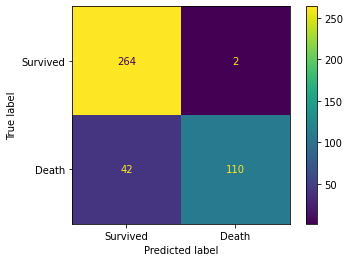

In [ ]:
cm = confusion_matrix(y_test, y_pred)

disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=target_names)
disp.plot();

In [ ]:
print(classification_report(y_test, y_pred, target_names=target_names, digits=3))

              precision    recall  f1-score   support

    Survived      0.863     0.992     0.923       266
       Death      0.982     0.724     0.833       152

    accuracy                          0.895       418
   macro avg      0.922     0.858     0.878       418
weighted avg      0.906     0.895     0.890       418



In [ ]:
importance = pd.DataFrame(model.feature_importances_, index=x_train.columns, columns=['ratio'])
importance[importance.ratio > 1 / len(importance)].sort_values(by='ratio', ascending=False)

,ratio
Sex_male,0.657418
Pclass_3,0.163810
Pclass_1,0.051591
Fare_56.4958,0.048565
Embarked_S,0.046290
Age_48.0,0.016283
Fare_151.55,0.016043


In [ ]:
temp[0] = [recall_score(y_test, y_pred, average=None)[0], 
           recall_score(y_test, y_pred, average=None)[1],
           recall_score(y_test, y_pred, average=None).sum(),
           accuracy_score(y_test, y_pred)]
temp

array([[0.9925, 0.7237, 1.7162, 0.8947],
       [0.    , 0.    , 0.    , 0.    ],
       [0.    , 0.    , 0.    , 0.    ],
       [0.    , 0.    , 0.    , 0.    ]])

#### Focus on accuracy by tuning z

In [ ]:
c1 = np.zeros((10, 99))

for i in range(1, 11):
    print('The depth =', i)

    model = DecisionTreeClassifier(max_depth=i, random_state=100)
    model.fit(x_train_std, y_train)

    for z in range(zstep, 100, zstep):                       
        y_pred = np.where(model.predict_proba(x_val_std)[:, 1] > z / 100, 1, 0) 

        if z % 10 == 0:
            print(f'The score for z = {z / 100:.2f} is {accuracy_score(y_val, y_pred):.6f}.')
            
        c1[i - 1, int((z - zstep) / zstep)] = accuracy_score(y_val, y_pred)
    
    print()

c2 = np.unravel_index(np.argmax(c1), c1.shape)
print(c2)

print(f'The proper depth and z are {c2[0] + 1} and {(c2[1] * zstep + zstep) / 100:.2f}.')

The depth = 1
The score for z = 0.10 is 0.335196.
The score for z = 0.20 is 0.335196.
The score for z = 0.30 is 0.810056.
The score for z = 0.40 is 0.810056.
The score for z = 0.50 is 0.810056.
The score for z = 0.60 is 0.810056.
The score for z = 0.70 is 0.810056.
The score for z = 0.80 is 0.664804.
The score for z = 0.90 is 0.664804.

The depth = 2
The score for z = 0.10 is 0.335196.
The score for z = 0.20 is 0.776536.
The score for z = 0.30 is 0.776536.
The score for z = 0.40 is 0.810056.
The score for z = 0.50 is 0.810056.
The score for z = 0.60 is 0.821229.
The score for z = 0.70 is 0.821229.
The score for z = 0.80 is 0.821229.
The score for z = 0.90 is 0.821229.

The depth = 3
The score for z = 0.10 is 0.335196.
The score for z = 0.20 is 0.765363.
The score for z = 0.30 is 0.765363.
The score for z = 0.40 is 0.821229.
The score for z = 0.50 is 0.821229.
The score for z = 0.60 is 0.821229.
The score for z = 0.70 is 0.821229.
The score for z = 0.80 is 0.810056.
The score for z = 0.

In [ ]:
model = DecisionTreeClassifier(max_depth= (c2[0] + 1), random_state=100)
model.fit(x_train_std, y_train)

y_pred = np.where(model.predict_proba(x_test_std)[:, 1] > (c2[1] * zstep + zstep) / 100, 1, 0)  

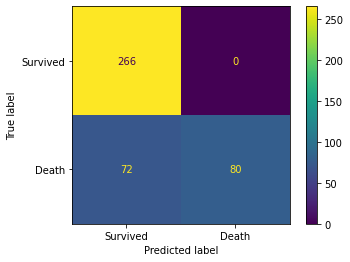

In [ ]:
cm = confusion_matrix(y_test, y_pred)

disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=target_names)
disp.plot();

In [ ]:
print(classification_report(y_test, y_pred, target_names=target_names, digits=3))

              precision    recall  f1-score   support

    Survived      0.787     1.000     0.881       266
       Death      1.000     0.526     0.690       152

    accuracy                          0.828       418
   macro avg      0.893     0.763     0.785       418
weighted avg      0.864     0.828     0.811       418



In [ ]:
importance = pd.DataFrame(model.feature_importances_, index=x_train.columns, columns=['ratio'])
importance[importance.ratio > 1 / len(importance)].sort_values(by='ratio', ascending=False)

,ratio
Sex_male,0.753212
Pclass_3,0.187679
Pclass_1,0.059109


In [ ]:
temp[1] = [recall_score(y_test, y_pred, average=None)[0], 
           recall_score(y_test, y_pred, average=None)[1],
           recall_score(y_test, y_pred, average=None).sum(),
           accuracy_score(y_test, y_pred)]
temp

array([[0.9925, 0.7237, 1.7162, 0.8947],
       [1.    , 0.5263, 1.5263, 0.8278],
       [0.    , 0.    , 0.    , 0.    ],
       [0.    , 0.    , 0.    , 0.    ]])

#### Focus on recall

In [ ]:
c1 = []

for i in range(1, 11):
    model = DecisionTreeClassifier(max_depth=i, random_state=100, class_weight='balanced')
    model.fit(x_train_std, y_train)
    y_pred = model.predict(x_val_std) 
    recall = recall_score(y_val, y_pred, average=None).sum()
    print(f'The recall for depth {i} is {recall:.6f}.')
    c1.append(recall)

print()

c2 = np.argmax(c1)
print(f'The proper depth is {c2 + 1}.')

The recall for depth 1 is 1.606863.
The recall for depth 2 is 1.606863.
The recall for depth 3 is 1.541036.
The recall for depth 4 is 1.515826.
The recall for depth 5 is 1.465686.
The recall for depth 6 is 1.457143.
The recall for depth 7 is 1.457143.
The recall for depth 8 is 1.531933.
The recall for depth 9 is 1.540196.
The recall for depth 10 is 1.532493.

The proper depth is 1.


In [ ]:
model = DecisionTreeClassifier(max_depth= (c2 + 1), random_state=100, class_weight='balanced')
model.fit(x_train_std, y_train)

y_pred = model.predict(x_test_std) 

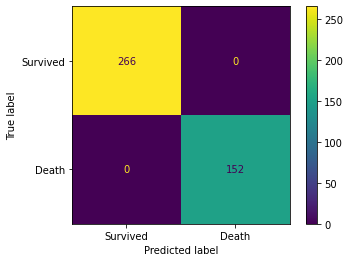

In [ ]:
cm = confusion_matrix(y_test, y_pred)

disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=target_names)
disp.plot();

In [ ]:
print(classification_report(y_test, y_pred, target_names=target_names, digits=3))

              precision    recall  f1-score   support

    Survived      1.000     1.000     1.000       266
       Death      1.000     1.000     1.000       152

    accuracy                          1.000       418
   macro avg      1.000     1.000     1.000       418
weighted avg      1.000     1.000     1.000       418



In [ ]:
importance = pd.DataFrame(model.feature_importances_, index=x_train.columns, columns=['ratio'])
importance[importance.ratio > 1 / len(importance)].sort_values(by='ratio', ascending=False)

,ratio
Sex_male,1.0


In [ ]:
temp[2] = [recall_score(y_test, y_pred, average=None)[0], 
           recall_score(y_test, y_pred, average=None)[1],
           recall_score(y_test, y_pred, average=None).sum(),
           accuracy_score(y_test, y_pred)]
temp

array([[0.9925, 0.7237, 1.7162, 0.8947],
       [1.    , 0.5263, 1.5263, 0.8278],
       [1.    , 1.    , 2.    , 1.    ],
       [0.    , 0.    , 0.    , 0.    ]])

#### Focus on recall by tuning z

In [ ]:
c1 = np.zeros((10, 99))

for i in range(1, 11):
    print('The depth =', i)

    model = DecisionTreeClassifier(max_depth=i, random_state=100, class_weight='balanced')
    model.fit(x_train_std, y_train)

    for z in range(zstep, 100, zstep):                       
        y_pred = np.where(model.predict_proba(x_val_std)[:, 1] > z / 100, 1, 0) 
        recall = recall_score(y_val, y_pred, average=None).sum()

        if z % 10 == 0:
            print(f'The recall for z = {z / 100:.2f} is {recall:.6f}.')
            
        c1[i - 1, int((z - zstep) / zstep)] = recall
    
    print()

c2 = np.unravel_index(np.argmax(c1), c1.shape)
print(c2)

print(f'The proper depth and z are {c2[0] + 1} and {(c2[1] * zstep + zstep) / 100:.2f}.')

The depth = 1
The recall for z = 0.10 is 1.000000.
The recall for z = 0.20 is 1.000000.
The recall for z = 0.30 is 1.606863.
The recall for z = 0.40 is 1.606863.
The recall for z = 0.50 is 1.606863.
The recall for z = 0.60 is 1.606863.
The recall for z = 0.70 is 1.606863.
The recall for z = 0.80 is 1.606863.
The recall for z = 0.90 is 1.000000.

The depth = 2
The recall for z = 0.10 is 1.000000.
The recall for z = 0.20 is 1.000000.
The recall for z = 0.30 is 1.606022.
The recall for z = 0.40 is 1.606022.
The recall for z = 0.50 is 1.606863.
The recall for z = 0.60 is 1.606863.
The recall for z = 0.70 is 1.491457.
The recall for z = 0.80 is 1.491457.
The recall for z = 0.90 is 1.491457.

The depth = 3
The recall for z = 0.10 is 1.000000.
The recall for z = 0.20 is 1.000000.
The recall for z = 0.30 is 1.589216.
The recall for z = 0.40 is 1.589216.
The recall for z = 0.50 is 1.541036.
The recall for z = 0.60 is 1.541036.
The recall for z = 0.70 is 1.541036.
The recall for z = 0.80 is 1.47

In [ ]:
model = DecisionTreeClassifier(max_depth= (c2[0] + 1), random_state=100, class_weight='balanced')
model.fit(x_train_std, y_train)

y_pred = np.where(model.predict_proba(x_test_std)[:, 1] > (c2[1] * zstep + zstep) / 100, 1, 0) 

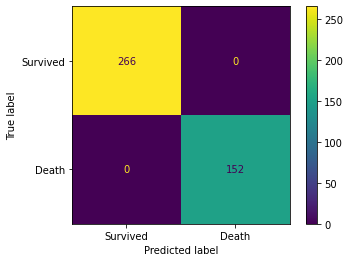

In [ ]:
cm = confusion_matrix(y_test, y_pred)

disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=target_names)
disp.plot();

In [ ]:
print(classification_report(y_test, y_pred, target_names=target_names, digits=3))

              precision    recall  f1-score   support

    Survived      1.000     1.000     1.000       266
       Death      1.000     1.000     1.000       152

    accuracy                          1.000       418
   macro avg      1.000     1.000     1.000       418
weighted avg      1.000     1.000     1.000       418



In [ ]:
importance = pd.DataFrame(model.feature_importances_, index=x_train.columns, columns=['ratio'])
importance[importance.ratio > 1 / len(importance)].sort_values(by='ratio', ascending=False)

,ratio
Sex_male,1.0


In [ ]:
temp[3] = [recall_score(y_test, y_pred, average=None)[0], 
           recall_score(y_test, y_pred, average=None)[1],
           recall_score(y_test, y_pred, average=None).sum(),
           accuracy_score(y_test, y_pred)]
temp

array([[0.9925, 0.7237, 1.7162, 0.8947],
       [1.    , 0.5263, 1.5263, 0.8278],
       [1.    , 1.    , 2.    , 1.    ],
       [1.    , 1.    , 2.    , 1.    ]])

In [ ]:
Result.loc['DT'] = temp
Result

recall_0  recall_1  recall_sum       acc
Logistic   Ig_im          0.984962  0.480263    1.465226  0.801435
           Ig_im_tun_z    0.890977  0.776316    1.667293  0.849282
           Deal_im        0.823308  0.861842    1.685150  0.837321
           Deal_im_tun_z  0.890977  0.776316    1.667293  0.849282
KNN        Ig_im          0.909774  0.289474    1.199248  0.684211
           Ig_im_tun_z    0.909774  0.289474    1.199248  0.684211
           Deal_im        0.635338  0.532895    1.168233  0.598086
           Deal_im_tun_z  0.488722  0.710526    1.199248  0.569378
GaussianNB Ig_im          0.161654  0.809211    0.970865  0.397129
           Ig_im_tun_z    0.161654  0.809211    0.970865  0.397129
           Deal_im        0.161654  0.809211    0.970865  0.397129
           Deal_im_tun_z  0.161654  0.809211    0.970865  0.397129
DT         Ig_im          0.992481  0.723684    1.716165  0.894737
           Ig_im_tun_z    1.000000  0.526316    1.526316  0.827751
           Deal_im        1.000000  1.000000    2.000000  1.000000
           Deal_im_tun_z  1.000000  1.000000    2.000000  1.000000
RF         Ig_im          0.000000  0.000000    0.000000  0.000000
           Ig_im_tun_z    0.000000  0.000000    0.000000  0.000000
           Deal_im        0.000000  0.000000    0.000000  0.000000
           Deal_im_tun_z  0.000000  0.000000    0.000000  0.000000
Bagging    Ig_im          0.000000  0.000000    0.000000  0.000000
           Ig_im_tun_z    0.000000  0.000000    0.000000  0.000000
           Deal_im        0.000000  0.000000    0.000000  0.000000
           Deal_im_tun_z  0.000000  0.000000    0.000000  0.000000
AdaBoost   Ig_im          0.000000  0.000000    0.000000  0.000000
           Ig_im_tun_z    0.000000  0.000000    0.000000  0.000000
           Deal_im        0.000000  0.000000    0.000000  0.000000
           Deal_im_tun_z  0.000000  0.000000    0.000000  0.000000
XGBBoost   Ig_im          0.000000  0.000000    0.000000  0.000000
           Ig_im_tun_z    0.000000  0.000000    0.000000  0.000000
           Deal_im        0.000000  0.000000    0.000000  0.000000
           Deal_im_tun_z  0.000000  0.000000    0.000000  0.000000
SVM        Ig_im          0.000000  0.000000    0.000000  0.000000
           Ig_im_tun_z    0.000000  0.000000    0.000000  0.000000
           Deal_im        0.000000  0.000000    0.000000  0.000000
           Deal_im_tun_z  0.000000  0.000000    0.000000  0.000000
NN-Scikit  Ig_im          0.000000  0.000000    0.000000  0.000000
           Ig_im_tun_z    0.000000  0.000000    0.000000  0.000000
           Deal_im        0.000000  0.000000    0.000000  0.000000
           Deal_im_tun_z  0.000000  0.000000    0.000000  0.000000
NN-TF      Ig_im          0.000000  0.000000    0.000000  0.000000
           Ig_im_tun_z    0.000000  0.000000    0.000000  0.000000
           Deal_im        0.000000  0.000000    0.000000  0.000000
           Deal_im_tun_z  0.000000  0.000000    0.000000  0.000000

## Random Forest

In [ ]:
temp = np.zeros((4, 4))

#### Focus on accuracy

In [ ]:
c1 = []

for i in range(1, 11):
    model = RandomForestClassifier(n_estimators = i * 100, random_state=100)
    model.fit(x_train_std, y_train)
    print(f'The score for tree numbers {i * 100} is {model.score(x_val_std, y_val):.6f}.')
    c1.append(model.score(x_val_std, y_val))

print()

c2 = np.argmax(c1)
print(f'The proper tree numbers is {100 * (c2 + 1)}.')

The score for tree numbers 100 is 0.810056.
The score for tree numbers 200 is 0.810056.
The score for tree numbers 300 is 0.821229.
The score for tree numbers 400 is 0.821229.
The score for tree numbers 500 is 0.815642.
The score for tree numbers 600 is 0.815642.
The score for tree numbers 700 is 0.815642.
The score for tree numbers 800 is 0.821229.
The score for tree numbers 900 is 0.821229.
The score for tree numbers 1000 is 0.821229.

The proper tree numbers is 300.


In [ ]:
model = RandomForestClassifier(n_estimators = 100 * (c2 + 1), random_state=100)
model.fit(x_train_std, y_train)

y_pred = model.predict(x_test_std) 

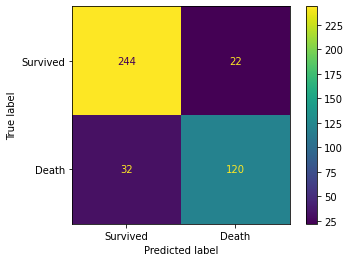

In [ ]:
cm = confusion_matrix(y_test, y_pred)

disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=target_names)
disp.plot();

In [ ]:
print(classification_report(y_test, y_pred, target_names=target_names, digits=3))

              precision    recall  f1-score   support

    Survived      0.884     0.917     0.900       266
       Death      0.845     0.789     0.816       152

    accuracy                          0.871       418
   macro avg      0.865     0.853     0.858       418
weighted avg      0.870     0.871     0.870       418



In [ ]:
importance = pd.DataFrame(model.feature_importances_, index=x_train.columns, columns=['ratio'])
importance[importance.ratio > 1 / len(importance)].sort_values(by='ratio', ascending=False)

,ratio
Sex_female,0.120106
Sex_male,0.113997
Pclass_3,0.048643
Pclass_1,0.026516
Age_nan,0.019863
...,...
SibSp_4,0.002526
Fare_18.75,0.002516
Fare_8.1375,0.002511
Fare_31.3875,0.002502


In [ ]:
temp[0] = [recall_score(y_test, y_pred, average=None)[0], 
           recall_score(y_test, y_pred, average=None)[1],
           recall_score(y_test, y_pred, average=None).sum(),
           accuracy_score(y_test, y_pred)]
temp

array([[0.9173, 0.7895, 1.7068, 0.8708],
       [0.    , 0.    , 0.    , 0.    ],
       [0.    , 0.    , 0.    , 0.    ],
       [0.    , 0.    , 0.    , 0.    ]])

#### Focus on accuracy by tuning z

In [ ]:
c1 = np.zeros((10, 99))

for i in range(1, 11):
    print('The tree numbers =', i * 100)
    model = RandomForestClassifier(n_estimators = i * 100, random_state=100)
    model.fit(x_train_std, y_train)

    for z in range(zstep, 100, zstep):                       
        y_pred = np.where(model.predict_proba(x_val_std)[:, 1] > z / 100, 1, 0) 

        if z % 10 == 0:
            print(f'The score for z = {z / 100:.2f} is {accuracy_score(y_val, y_pred):.6f}.')

        c1[i - 1, int((z - zstep) / zstep)] = accuracy_score(y_val, y_pred)
    
    print()

c2 = np.unravel_index(np.argmax(c1), c1.shape)
print(c2)

print(f'The proper tree numbers and z are {100 * (c2[0] + 1)} and {(c2[1] * zstep + zstep) / 100:.2f}.')

The tree numbers = 100
The score for z = 0.10 is 0.586592.
The score for z = 0.20 is 0.703911.
The score for z = 0.30 is 0.759777.
The score for z = 0.40 is 0.782123.
The score for z = 0.50 is 0.810056.
The score for z = 0.60 is 0.810056.
The score for z = 0.70 is 0.826816.
The score for z = 0.80 is 0.810056.
The score for z = 0.90 is 0.754190.

The tree numbers = 200
The score for z = 0.10 is 0.603352.
The score for z = 0.20 is 0.715084.
The score for z = 0.30 is 0.776536.
The score for z = 0.40 is 0.793296.
The score for z = 0.50 is 0.810056.
The score for z = 0.60 is 0.821229.
The score for z = 0.70 is 0.826816.
The score for z = 0.80 is 0.821229.
The score for z = 0.90 is 0.748603.

The tree numbers = 300
The score for z = 0.10 is 0.586592.
The score for z = 0.20 is 0.703911.
The score for z = 0.30 is 0.770950.
The score for z = 0.40 is 0.787709.
The score for z = 0.50 is 0.821229.
The score for z = 0.60 is 0.821229.
The score for z = 0.70 is 0.832402.
The score for z = 0.80 is 0.8

In [ ]:
model = RandomForestClassifier(n_estimators = 100 * (c2[0] + 1), random_state=100)
model.fit(x_train_std, y_train)

y_pred = np.where(model.predict_proba(x_test_std)[:, 1] > (c2[1] * zstep + zstep) / 100, 1, 0)  

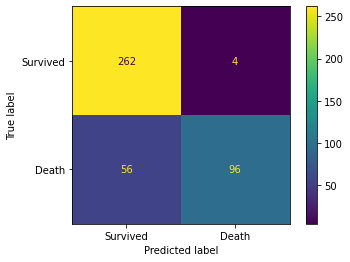

In [ ]:
cm = confusion_matrix(y_test, y_pred)

disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=target_names)
disp.plot();

In [ ]:
print(classification_report(y_test, y_pred, target_names=target_names, digits=3))

              precision    recall  f1-score   support

    Survived      0.824     0.985     0.897       266
       Death      0.960     0.632     0.762       152

    accuracy                          0.856       418
   macro avg      0.892     0.808     0.830       418
weighted avg      0.873     0.856     0.848       418



In [ ]:
importance = pd.DataFrame(model.feature_importances_, index=x_train.columns, columns=['ratio'])
importance[importance.ratio > 1 / len(importance)].sort_values(by='ratio', ascending=False)

,ratio
Sex_female,0.122280
Sex_male,0.104316
Pclass_3,0.047158
Pclass_1,0.027797
Age_nan,0.019967
...,...
Fare_31.275,0.002595
Fare_7.6292,0.002586
Fare_8.1375,0.002576
Fare_7.8542,0.002563


In [ ]:
temp[1] = [recall_score(y_test, y_pred, average=None)[0], 
           recall_score(y_test, y_pred, average=None)[1],
           recall_score(y_test, y_pred, average=None).sum(),
           accuracy_score(y_test, y_pred)]
temp

array([[0.9173, 0.7895, 1.7068, 0.8708],
       [0.985 , 0.6316, 1.6165, 0.8565],
       [0.    , 0.    , 0.    , 0.    ],
       [0.    , 0.    , 0.    , 0.    ]])

#### Focus on recall

In [ ]:
c1 = []

for i in range(1, 11):
    model = RandomForestClassifier(n_estimators = i * 100, random_state=100, class_weight='balanced_subsample')
    model.fit(x_train_std, y_train)
    y_pred = model.predict(x_val_std) 
    recall = recall_score(y_val, y_pred, average=None).sum()
    print(f'The recall for tree numbers {i * 100} is {recall:.6f}.')
    c1.append(recall)

print()

c2 = np.argmax(c1)
print(f'The proper tree numbers is {100 * (c2 + 1)}.')

The recall for tree numbers 100 is 1.598739.
The recall for tree numbers 200 is 1.590336.
The recall for tree numbers 300 is 1.573669.
The recall for tree numbers 400 is 1.598599.
The recall for tree numbers 500 is 1.607003.
The recall for tree numbers 600 is 1.581933.
The recall for tree numbers 700 is 1.590196.
The recall for tree numbers 800 is 1.607003.
The recall for tree numbers 900 is 1.598599.
The recall for tree numbers 1000 is 1.598599.

The proper tree numbers is 500.


In [ ]:
model = RandomForestClassifier(n_estimators = 100 * (c2 + 1), random_state=100, class_weight='balanced_subsample')
model.fit(x_train_std, y_train)

y_pred = model.predict(x_test_std) 

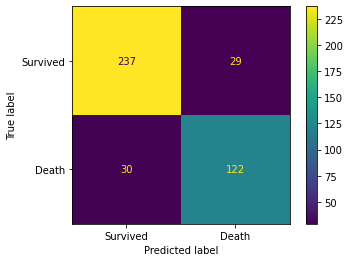

In [ ]:
cm = confusion_matrix(y_test, y_pred)

disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=target_names)
disp.plot();

In [ ]:
print(classification_report(y_test, y_pred, target_names=target_names, digits=3))

              precision    recall  f1-score   support

    Survived      0.888     0.891     0.889       266
       Death      0.808     0.803     0.805       152

    accuracy                          0.859       418
   macro avg      0.848     0.847     0.847       418
weighted avg      0.859     0.859     0.859       418



In [ ]:
importance = pd.DataFrame(model.feature_importances_, index=x_train.columns, columns=['ratio'])
importance[importance.ratio > 1 / len(importance)].sort_values(by='ratio', ascending=False)

,ratio
Sex_female,0.113962
Sex_male,0.113499
Pclass_3,0.046304
Pclass_1,0.025863
Age_nan,0.021293
...,...
Fare_69.55,0.002590
Fare_52.0,0.002563
Age_30.5,0.002547
Age_47.0,0.002534


In [ ]:
temp[2] = [recall_score(y_test, y_pred, average=None)[0], 
           recall_score(y_test, y_pred, average=None)[1],
           recall_score(y_test, y_pred, average=None).sum(),
           accuracy_score(y_test, y_pred)]
temp

array([[0.9173, 0.7895, 1.7068, 0.8708],
       [0.985 , 0.6316, 1.6165, 0.8565],
       [0.891 , 0.8026, 1.6936, 0.8589],
       [0.    , 0.    , 0.    , 0.    ]])

#### Focus on recall by tuning z

In [ ]:
c1 = np.zeros((10, 99))

for i in range(1, 11):
    print('The tree numbers =', i * 100)

    model = RandomForestClassifier(n_estimators = i * 100, random_state=100, class_weight='balanced_subsample')
    model.fit(x_train_std, y_train)

    for z in range(zstep, 100, zstep):                       
        y_pred = np.where(model.predict_proba(x_val_std)[:, 1] > z / 100, 1, 0) 
        recall = recall_score(y_val, y_pred, average=None).sum()

        if z % 10 == 0:
            print(f'The recall for z = {z / 100:.2f} is {recall:.6f}.')
            
        c1[i - 1, int((z - zstep) / zstep)] = recall
    
    print()

c2 = np.unravel_index(np.argmax(c1), c1.shape)
print(c2)

print(f'The proper tree numbers and z are {100 * (c2[0] + 1)} and {(c2[1] * zstep + zstep) / 100:.2f}.')

The tree numbers = 100
The recall for z = 0.10 is 1.319888.
The recall for z = 0.20 is 1.479832.
The recall for z = 0.30 is 1.564146.
The recall for z = 0.40 is 1.581373.
The recall for z = 0.50 is 1.598739.
The recall for z = 0.60 is 1.574090.
The recall for z = 0.70 is 1.515826.
The recall for z = 0.80 is 1.524650.
The recall for z = 0.90 is 1.341317.

The tree numbers = 200
The recall for z = 0.10 is 1.294818.
The recall for z = 0.20 is 1.454622.
The recall for z = 0.30 is 1.564286.
The recall for z = 0.40 is 1.572969.
The recall for z = 0.50 is 1.590336.
The recall for z = 0.60 is 1.582493.
The recall for z = 0.70 is 1.540896.
The recall for z = 0.80 is 1.491176.
The recall for z = 0.90 is 1.324650.

The tree numbers = 300
The recall for z = 0.10 is 1.353501.
The recall for z = 0.20 is 1.454762.
The recall for z = 0.30 is 1.589496.
The recall for z = 0.40 is 1.581373.
The recall for z = 0.50 is 1.573669.
The recall for z = 0.60 is 1.574090.
The recall for z = 0.70 is 1.549160.
The 

In [ ]:
model = RandomForestClassifier(n_estimators = 100 * (c2[0] + 1), random_state=100, class_weight='balanced_subsample')
model.fit(x_train_std, y_train)

y_pred = np.where(model.predict_proba(x_test_std)[:, 1] > (c2[1] * zstep + zstep) / 100, 1, 0) 

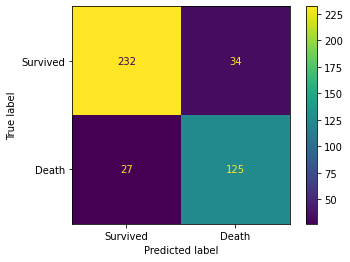

In [ ]:
cm = confusion_matrix(y_test, y_pred)

disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=target_names)
disp.plot();

In [ ]:
print(classification_report(y_test, y_pred, target_names=target_names, digits=3))

              precision    recall  f1-score   support

    Survived      0.896     0.872     0.884       266
       Death      0.786     0.822     0.804       152

    accuracy                          0.854       418
   macro avg      0.841     0.847     0.844       418
weighted avg      0.856     0.854     0.855       418



In [ ]:
importance = pd.DataFrame(model.feature_importances_, index=x_train.columns, columns=['ratio'])
importance[importance.ratio > 1 / len(importance)].sort_values(by='ratio', ascending=False)

,ratio
Sex_female,0.117439
Sex_male,0.111934
Pclass_3,0.046034
Pclass_1,0.024790
Age_nan,0.021469
...,...
Fare_27.9,0.002570
Age_47.0,0.002537
Fare_512.3292,0.002528
Fare_8.1375,0.002522


In [ ]:
temp[3] = [recall_score(y_test, y_pred, average=None)[0], 
           recall_score(y_test, y_pred, average=None)[1],
           recall_score(y_test, y_pred, average=None).sum(),
           accuracy_score(y_test, y_pred)]
temp

array([[0.9173, 0.7895, 1.7068, 0.8708],
       [0.985 , 0.6316, 1.6165, 0.8565],
       [0.891 , 0.8026, 1.6936, 0.8589],
       [0.8722, 0.8224, 1.6945, 0.8541]])

In [ ]:
Result.loc['RF'] = temp
Result

recall_0  recall_1  recall_sum       acc
Logistic   Ig_im          0.984962  0.480263    1.465226  0.801435
           Ig_im_tun_z    0.890977  0.776316    1.667293  0.849282
           Deal_im        0.823308  0.861842    1.685150  0.837321
           Deal_im_tun_z  0.890977  0.776316    1.667293  0.849282
KNN        Ig_im          0.909774  0.289474    1.199248  0.684211
           Ig_im_tun_z    0.909774  0.289474    1.199248  0.684211
           Deal_im        0.635338  0.532895    1.168233  0.598086
           Deal_im_tun_z  0.488722  0.710526    1.199248  0.569378
GaussianNB Ig_im          0.161654  0.809211    0.970865  0.397129
           Ig_im_tun_z    0.161654  0.809211    0.970865  0.397129
           Deal_im        0.161654  0.809211    0.970865  0.397129
           Deal_im_tun_z  0.161654  0.809211    0.970865  0.397129
DT         Ig_im          0.992481  0.723684    1.716165  0.894737
           Ig_im_tun_z    1.000000  0.526316    1.526316  0.827751
           Deal_im        1.000000  1.000000    2.000000  1.000000
           Deal_im_tun_z  1.000000  1.000000    2.000000  1.000000
RF         Ig_im          0.917293  0.789474    1.706767  0.870813
           Ig_im_tun_z    0.984962  0.631579    1.616541  0.856459
           Deal_im        0.890977  0.802632    1.693609  0.858852
           Deal_im_tun_z  0.872180  0.822368    1.694549  0.854067
Bagging    Ig_im          0.000000  0.000000    0.000000  0.000000
           Ig_im_tun_z    0.000000  0.000000    0.000000  0.000000
           Deal_im        0.000000  0.000000    0.000000  0.000000
           Deal_im_tun_z  0.000000  0.000000    0.000000  0.000000
AdaBoost   Ig_im          0.000000  0.000000    0.000000  0.000000
           Ig_im_tun_z    0.000000  0.000000    0.000000  0.000000
           Deal_im        0.000000  0.000000    0.000000  0.000000
           Deal_im_tun_z  0.000000  0.000000    0.000000  0.000000
XGBBoost   Ig_im          0.000000  0.000000    0.000000  0.000000
           Ig_im_tun_z    0.000000  0.000000    0.000000  0.000000
           Deal_im        0.000000  0.000000    0.000000  0.000000
           Deal_im_tun_z  0.000000  0.000000    0.000000  0.000000
SVM        Ig_im          0.000000  0.000000    0.000000  0.000000
           Ig_im_tun_z    0.000000  0.000000    0.000000  0.000000
           Deal_im        0.000000  0.000000    0.000000  0.000000
           Deal_im_tun_z  0.000000  0.000000    0.000000  0.000000
NN-Scikit  Ig_im          0.000000  0.000000    0.000000  0.000000
           Ig_im_tun_z    0.000000  0.000000    0.000000  0.000000
           Deal_im        0.000000  0.000000    0.000000  0.000000
           Deal_im_tun_z  0.000000  0.000000    0.000000  0.000000
NN-TF      Ig_im          0.000000  0.000000    0.000000  0.000000
           Ig_im_tun_z    0.000000  0.000000    0.000000  0.000000
           Deal_im        0.000000  0.000000    0.000000  0.000000
           Deal_im_tun_z  0.000000  0.000000    0.000000  0.000000

## Bagging 

In [ ]:
temp = np.zeros((4, 4))

#### Focus on accuracy

In [ ]:
c1 = []

for i in range(1, 11):
    model = BaggingClassifier(n_estimators=i * 100, random_state=100)
    model.fit(x_train_std, y_train)
    print(f'The score for tree numbers {i * 100} is {model.score(x_val_std, y_val):.6f}.')
    c1.append(model.score(x_val_std, y_val))

print()

c2 = np.argmax(c1)
print(f'The proper tree numbers is {100 * (c2 + 1)}.')

The score for tree numbers 100 is 0.793296.
The score for tree numbers 200 is 0.793296.
The score for tree numbers 300 is 0.787709.
The score for tree numbers 400 is 0.787709.
The score for tree numbers 500 is 0.787709.
The score for tree numbers 600 is 0.787709.
The score for tree numbers 700 is 0.793296.
The score for tree numbers 800 is 0.793296.
The score for tree numbers 900 is 0.787709.
The score for tree numbers 1000 is 0.793296.

The proper tree numbers is 100.


In [ ]:
c1 = []

for i in range(1, 21):
    model = BaggingClassifier(n_estimators=i * 10, random_state=100)
    model.fit(x_train_std, y_train)
    print(f'The score for tree numbers {i * 10} is {model.score(x_val_std, y_val):.6f}.')
    c1.append(model.score(x_val_std, y_val))

print()

c2 = np.argmax(c1)
print(f'The proper tree numbers is {10 * (c2 + 1)}.')

The score for tree numbers 10 is 0.793296.
The score for tree numbers 20 is 0.798883.
The score for tree numbers 30 is 0.793296.
The score for tree numbers 40 is 0.793296.
The score for tree numbers 50 is 0.793296.
The score for tree numbers 60 is 0.793296.
The score for tree numbers 70 is 0.793296.
The score for tree numbers 80 is 0.793296.
The score for tree numbers 90 is 0.793296.
The score for tree numbers 100 is 0.793296.
The score for tree numbers 110 is 0.798883.
The score for tree numbers 120 is 0.798883.
The score for tree numbers 130 is 0.798883.
The score for tree numbers 140 is 0.798883.
The score for tree numbers 150 is 0.793296.
The score for tree numbers 160 is 0.793296.
The score for tree numbers 170 is 0.793296.
The score for tree numbers 180 is 0.798883.
The score for tree numbers 190 is 0.793296.
The score for tree numbers 200 is 0.793296.

The proper tree numbers is 20.


In [ ]:
model = BaggingClassifier(n_estimators = 10 * (c2 + 1), random_state=100)
model.fit(x_train_std, y_train)

y_pred = model.predict(x_test_std) 

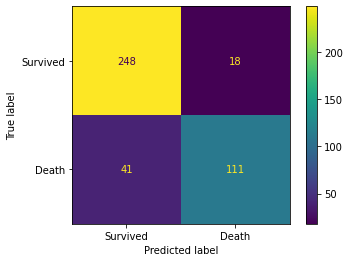

In [ ]:
cm = confusion_matrix(y_test, y_pred)

disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=target_names)
disp.plot();

In [ ]:
print(classification_report(y_test, y_pred, target_names=target_names, digits=3))

              precision    recall  f1-score   support

    Survived      0.858     0.932     0.894       266
       Death      0.860     0.730     0.790       152

    accuracy                          0.859       418
   macro avg      0.859     0.831     0.842       418
weighted avg      0.859     0.859     0.856       418



In [ ]:
temp[0] = [recall_score(y_test, y_pred, average=None)[0], 
           recall_score(y_test, y_pred, average=None)[1],
           recall_score(y_test, y_pred, average=None).sum(),
           accuracy_score(y_test, y_pred)]
temp

array([[0.9323, 0.7303, 1.6626, 0.8589],
       [0.    , 0.    , 0.    , 0.    ],
       [0.    , 0.    , 0.    , 0.    ],
       [0.    , 0.    , 0.    , 0.    ]])

#### Focus on accuracy by tuning z

In [ ]:
c1 = np.zeros((10, 99))

for i in range(1, 11):
    print('The tree numbers =', i * 100)
    model = BaggingClassifier(n_estimators = i * 100, random_state=100)
    model.fit(x_train_std, y_train)

    for z in range(zstep, 100, zstep):                       
        y_pred = np.where(model.predict_proba(x_val_std)[:, 1] > z / 100, 1, 0) 

        if z % 10 == 0:
            print(f'The score for z = {z / 100:.2f} is {accuracy_score(y_val, y_pred):.6f}.')
            
        c1[i - 1, int((z - zstep) / zstep)] = accuracy_score(y_val, y_pred)
    
    print()

c2 = np.unravel_index(np.argmax(c1), c1.shape)
print(c2)

print(f'The proper tree numbers and z are {100 * (c2[0] + 1)} and {(c2[1] * zstep + zstep) / 100:.2f}.')

The tree numbers = 100
The score for z = 0.10 is 0.726257.
The score for z = 0.20 is 0.765363.
The score for z = 0.30 is 0.782123.
The score for z = 0.40 is 0.787709.
The score for z = 0.50 is 0.793296.
The score for z = 0.60 is 0.821229.
The score for z = 0.70 is 0.815642.
The score for z = 0.80 is 0.810056.
The score for z = 0.90 is 0.798883.

The tree numbers = 200
The score for z = 0.10 is 0.726257.
The score for z = 0.20 is 0.765363.
The score for z = 0.30 is 0.782123.
The score for z = 0.40 is 0.793296.
The score for z = 0.50 is 0.793296.
The score for z = 0.60 is 0.821229.
The score for z = 0.70 is 0.821229.
The score for z = 0.80 is 0.804469.
The score for z = 0.90 is 0.798883.

The tree numbers = 300
The score for z = 0.10 is 0.737430.
The score for z = 0.20 is 0.770950.
The score for z = 0.30 is 0.782123.
The score for z = 0.40 is 0.793296.
The score for z = 0.50 is 0.787709.
The score for z = 0.60 is 0.821229.
The score for z = 0.70 is 0.815642.
The score for z = 0.80 is 0.8

In [ ]:
c1 = np.zeros((20, 99))

for i in range(1, 21):
    print('The tree numbers =', i * 10)
    model = BaggingClassifier(n_estimators = i * 10, random_state=100)
    model.fit(x_train_std, y_train)

    for z in range(zstep, 100, zstep):                       
        y_pred = np.where(model.predict_proba(x_val_std)[:, 1] > z / 100, 1, 0) 

        if z % 10 == 0:
            print(f'The score for z = {z / 100:.2f} is {accuracy_score(y_val, y_pred):.6f}.')
            
        c1[i - 1, int((z - zstep) / zstep)] = accuracy_score(y_val, y_pred)
    
    print()

c2 = np.unravel_index(np.argmax(c1), c1.shape)
print(c2)

print(f'The proper tree numbers and z are {10 * (c2[0] + 1)} and {(c2[1] * zstep + zstep) / 100:.2f}.')

The tree numbers = 10
The score for z = 0.10 is 0.743017.
The score for z = 0.20 is 0.782123.
The score for z = 0.30 is 0.793296.
The score for z = 0.40 is 0.798883.
The score for z = 0.50 is 0.793296.
The score for z = 0.60 is 0.782123.
The score for z = 0.70 is 0.787709.
The score for z = 0.80 is 0.810056.
The score for z = 0.90 is 0.804469.

The tree numbers = 20
The score for z = 0.10 is 0.715084.
The score for z = 0.20 is 0.770950.
The score for z = 0.30 is 0.798883.
The score for z = 0.40 is 0.798883.
The score for z = 0.50 is 0.798883.
The score for z = 0.60 is 0.804469.
The score for z = 0.70 is 0.804469.
The score for z = 0.80 is 0.810056.
The score for z = 0.90 is 0.793296.

The tree numbers = 30
The score for z = 0.10 is 0.715084.
The score for z = 0.20 is 0.765363.
The score for z = 0.30 is 0.793296.
The score for z = 0.40 is 0.798883.
The score for z = 0.50 is 0.793296.
The score for z = 0.60 is 0.821229.
The score for z = 0.70 is 0.815642.
The score for z = 0.80 is 0.8100

In [ ]:
model = BaggingClassifier(n_estimators = 10 * (c2[0] + 1), random_state=100)
model.fit(x_train_std, y_train)

y_pred = np.where(model.predict_proba(x_test_std)[:, 1] > (c2[1] * zstep + zstep) / 100, 1, 0) 

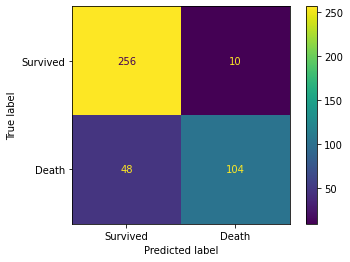

In [ ]:
cm = confusion_matrix(y_test, y_pred)

disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=target_names)
disp.plot();

In [ ]:
print(classification_report(y_test, y_pred, target_names=target_names, digits=3))

              precision    recall  f1-score   support

    Survived      0.842     0.962     0.898       266
       Death      0.912     0.684     0.782       152

    accuracy                          0.861       418
   macro avg      0.877     0.823     0.840       418
weighted avg      0.868     0.861     0.856       418



In [ ]:
temp[1] = [recall_score(y_test, y_pred, average=None)[0], 
           recall_score(y_test, y_pred, average=None)[1],
           recall_score(y_test, y_pred, average=None).sum(),
           accuracy_score(y_test, y_pred)]
temp

array([[0.9323, 0.7303, 1.6626, 0.8589],
       [0.9624, 0.6842, 1.6466, 0.8612],
       [0.    , 0.    , 0.    , 0.    ],
       [0.    , 0.    , 0.    , 0.    ]])

#### Focus on recall

In [ ]:
c1 = []

for i in range(1, 11):
    model =  BaggingClassifier(DecisionTreeClassifier(class_weight='balanced'), n_estimators = i * 100, random_state=100)
    model.fit(x_train_std, y_train)
    y_pred = model.predict(x_val_std) 
    recall = recall_score(y_val, y_pred, average=None).sum()
    print(f'The recall for tree numbers {i * 100} is {recall:.6f}.')
    c1.append(recall)

print()

c2 = np.argmax(c1)
print(f'The proper tree numbers is {100 * (c2 + 1)}.')

The recall for tree numbers 100 is 1.515266.
The recall for tree numbers 200 is 1.523669.
The recall for tree numbers 300 is 1.515266.
The recall for tree numbers 400 is 1.515266.
The recall for tree numbers 500 is 1.506863.
The recall for tree numbers 600 is 1.515266.
The recall for tree numbers 700 is 1.515266.
The recall for tree numbers 800 is 1.515266.
The recall for tree numbers 900 is 1.515266.
The recall for tree numbers 1000 is 1.515266.

The proper tree numbers is 200.


In [ ]:
model = BaggingClassifier(DecisionTreeClassifier(class_weight='balanced'), n_estimators = 100 * (c2 + 1), random_state=100)
model.fit(x_train_std, y_train)

y_pred = model.predict(x_test_std) 

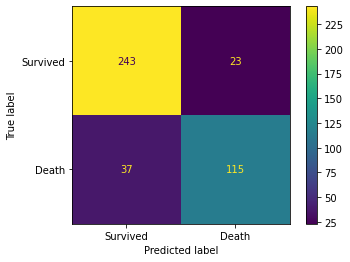

In [ ]:
cm = confusion_matrix(y_test, y_pred)

disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=target_names)
disp.plot();

In [ ]:
print(classification_report(y_test, y_pred, target_names=target_names, digits=3))

              precision    recall  f1-score   support

    Survived      0.868     0.914     0.890       266
       Death      0.833     0.757     0.793       152

    accuracy                          0.856       418
   macro avg      0.851     0.835     0.842       418
weighted avg      0.855     0.856     0.855       418



In [ ]:
temp[2] = [recall_score(y_test, y_pred, average=None)[0], 
           recall_score(y_test, y_pred, average=None)[1],
           recall_score(y_test, y_pred, average=None).sum(),
           accuracy_score(y_test, y_pred)]
temp

array([[0.9323, 0.7303, 1.6626, 0.8589],
       [0.9624, 0.6842, 1.6466, 0.8612],
       [0.9135, 0.7566, 1.6701, 0.8565],
       [0.    , 0.    , 0.    , 0.    ]])

#### Focus on recall by tuning z

In [ ]:
c1 = np.zeros((10, 99))

for i in range(1, 11):
    print('The tree numbers =', i * 100)

    model = BaggingClassifier(DecisionTreeClassifier(class_weight='balanced'), n_estimators = i * 100, random_state=100)
    model.fit(x_train_std, y_train)

    for z in range(zstep, 100, zstep):                       
        y_pred = np.where(model.predict_proba(x_val_std)[:, 1] > z / 100, 1, 0) 
        recall = recall_score(y_val, y_pred, average=None).sum()

        if z % 10 == 0:
            print(f'The recall for z = {z / 100:.2f} is {recall:.6f}.')
            
        c1[i - 1, int((z - zstep) / zstep)] = recall
    
    print()

c2 = np.unravel_index(np.argmax(c1), c1.shape)
print(c2)

print(f'The proper tree numbers and z are {100 * (c2[0] + 1)} and {(c2[1] * zstep + zstep) / 100:.2f}.')

The tree numbers = 100
The recall for z = 0.10 is 1.505462.
The recall for z = 0.20 is 1.530952.
The recall for z = 0.30 is 1.564846.
The recall for z = 0.40 is 1.523249.
The recall for z = 0.50 is 1.515266.
The recall for z = 0.60 is 1.565826.
The recall for z = 0.70 is 1.515826.
The recall for z = 0.80 is 1.515966.
The recall for z = 0.90 is 1.474510.

The tree numbers = 200
The recall for z = 0.10 is 1.497059.
The recall for z = 0.20 is 1.530952.
The recall for z = 0.30 is 1.581513.
The recall for z = 0.40 is 1.523249.
The recall for z = 0.50 is 1.523669.
The recall for z = 0.60 is 1.540616.
The recall for z = 0.70 is 1.532493.
The recall for z = 0.80 is 1.515966.
The recall for z = 0.90 is 1.474510.

The tree numbers = 300
The recall for z = 0.10 is 1.513725.
The recall for z = 0.20 is 1.530952.
The recall for z = 0.30 is 1.581513.
The recall for z = 0.40 is 1.539916.
The recall for z = 0.50 is 1.515266.
The recall for z = 0.60 is 1.523950.
The recall for z = 0.70 is 1.532493.
The 

In [ ]:
model = BaggingClassifier(DecisionTreeClassifier(class_weight='balanced'), n_estimators = 100 * (c2[0] + 1), random_state=100)
model.fit(x_train_std, y_train)

y_pred = np.where(model.predict_proba(x_test_std)[:, 1] > (c2[1] * zstep + zstep) / 100, 1, 0) 

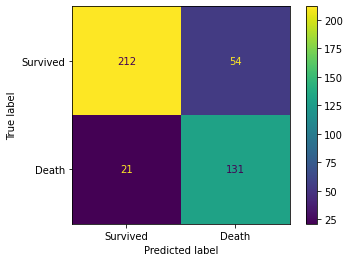

In [ ]:
cm = confusion_matrix(y_test, y_pred)

disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=target_names)
disp.plot();

In [ ]:
print(classification_report(y_test, y_pred, target_names=target_names, digits=3))

              precision    recall  f1-score   support

    Survived      0.910     0.797     0.850       266
       Death      0.708     0.862     0.777       152

    accuracy                          0.821       418
   macro avg      0.809     0.829     0.814       418
weighted avg      0.837     0.821     0.823       418



In [ ]:
temp[3] = [recall_score(y_test, y_pred, average=None)[0], 
           recall_score(y_test, y_pred, average=None)[1],
           recall_score(y_test, y_pred, average=None).sum(),
           accuracy_score(y_test, y_pred)]
temp

array([[0.9323, 0.7303, 1.6626, 0.8589],
       [0.9624, 0.6842, 1.6466, 0.8612],
       [0.9135, 0.7566, 1.6701, 0.8565],
       [0.797 , 0.8618, 1.6588, 0.8206]])

In [ ]:
Result.loc['Bagging'] = temp
Result

recall_0  recall_1  recall_sum       acc
Logistic   Ig_im          0.984962  0.480263    1.465226  0.801435
           Ig_im_tun_z    0.890977  0.776316    1.667293  0.849282
           Deal_im        0.823308  0.861842    1.685150  0.837321
           Deal_im_tun_z  0.890977  0.776316    1.667293  0.849282
KNN        Ig_im          0.909774  0.289474    1.199248  0.684211
           Ig_im_tun_z    0.909774  0.289474    1.199248  0.684211
           Deal_im        0.635338  0.532895    1.168233  0.598086
           Deal_im_tun_z  0.488722  0.710526    1.199248  0.569378
GaussianNB Ig_im          0.161654  0.809211    0.970865  0.397129
           Ig_im_tun_z    0.161654  0.809211    0.970865  0.397129
           Deal_im        0.161654  0.809211    0.970865  0.397129
           Deal_im_tun_z  0.161654  0.809211    0.970865  0.397129
DT         Ig_im          0.992481  0.723684    1.716165  0.894737
           Ig_im_tun_z    1.000000  0.526316    1.526316  0.827751
           Deal_im        1.000000  1.000000    2.000000  1.000000
           Deal_im_tun_z  1.000000  1.000000    2.000000  1.000000
RF         Ig_im          0.917293  0.789474    1.706767  0.870813
           Ig_im_tun_z    0.984962  0.631579    1.616541  0.856459
           Deal_im        0.890977  0.802632    1.693609  0.858852
           Deal_im_tun_z  0.872180  0.822368    1.694549  0.854067
Bagging    Ig_im          0.932331  0.730263    1.662594  0.858852
           Ig_im_tun_z    0.962406  0.684211    1.646617  0.861244
           Deal_im        0.913534  0.756579    1.670113  0.856459
           Deal_im_tun_z  0.796992  0.861842    1.658835  0.820574
AdaBoost   Ig_im          0.000000  0.000000    0.000000  0.000000
           Ig_im_tun_z    0.000000  0.000000    0.000000  0.000000
           Deal_im        0.000000  0.000000    0.000000  0.000000
           Deal_im_tun_z  0.000000  0.000000    0.000000  0.000000
XGBBoost   Ig_im          0.000000  0.000000    0.000000  0.000000
           Ig_im_tun_z    0.000000  0.000000    0.000000  0.000000
           Deal_im        0.000000  0.000000    0.000000  0.000000
           Deal_im_tun_z  0.000000  0.000000    0.000000  0.000000
SVM        Ig_im          0.000000  0.000000    0.000000  0.000000
           Ig_im_tun_z    0.000000  0.000000    0.000000  0.000000
           Deal_im        0.000000  0.000000    0.000000  0.000000
           Deal_im_tun_z  0.000000  0.000000    0.000000  0.000000
NN-Scikit  Ig_im          0.000000  0.000000    0.000000  0.000000
           Ig_im_tun_z    0.000000  0.000000    0.000000  0.000000
           Deal_im        0.000000  0.000000    0.000000  0.000000
           Deal_im_tun_z  0.000000  0.000000    0.000000  0.000000
NN-TF      Ig_im          0.000000  0.000000    0.000000  0.000000
           Ig_im_tun_z    0.000000  0.000000    0.000000  0.000000
           Deal_im        0.000000  0.000000    0.000000  0.000000
           Deal_im_tun_z  0.000000  0.000000    0.000000  0.000000

## AdaBoosting

In [ ]:
temp = np.zeros((4, 4))

#### Focus on accuracy

In [ ]:
c1 = []

for i in range(1, 11):
    model = AdaBoostClassifier(n_estimators=i * 100, random_state=100)
    model.fit(x_train_std, y_train)
    print(f'The score for tree numbers {i * 100} is {model.score(x_val_std, y_val):.6f}.')
    c1.append(model.score(x_val_std, y_val))

print()

c2 = np.argmax(c1)
print(f'The proper tree numbers is {100 * (c2 + 1)}.')

The score for tree numbers 100 is 0.787709.
The score for tree numbers 200 is 0.782123.
The score for tree numbers 300 is 0.765363.
The score for tree numbers 400 is 0.776536.
The score for tree numbers 500 is 0.770950.
The score for tree numbers 600 is 0.765363.
The score for tree numbers 700 is 0.776536.
The score for tree numbers 800 is 0.782123.
The score for tree numbers 900 is 0.782123.
The score for tree numbers 1000 is 0.782123.

The proper tree numbers is 100.


In [ ]:
c1 = []

for i in range(1, 21):
    model = AdaBoostClassifier(n_estimators=i * 10, random_state=100)
    model.fit(x_train_std, y_train)
    print(f'The score for tree numbers {i * 10} is {model.score(x_val_std, y_val):.6f}.')
    c1.append(model.score(x_val_std, y_val))

print()

c2 = np.argmax(c1)
print(f'The proper tree numbers is {10 * (c2 + 1)}.')

The score for tree numbers 10 is 0.776536.
The score for tree numbers 20 is 0.776536.
The score for tree numbers 30 is 0.765363.
The score for tree numbers 40 is 0.765363.
The score for tree numbers 50 is 0.759777.
The score for tree numbers 60 is 0.776536.
The score for tree numbers 70 is 0.782123.
The score for tree numbers 80 is 0.782123.
The score for tree numbers 90 is 0.782123.
The score for tree numbers 100 is 0.787709.
The score for tree numbers 110 is 0.787709.
The score for tree numbers 120 is 0.787709.
The score for tree numbers 130 is 0.793296.
The score for tree numbers 140 is 0.787709.
The score for tree numbers 150 is 0.787709.
The score for tree numbers 160 is 0.782123.
The score for tree numbers 170 is 0.776536.
The score for tree numbers 180 is 0.782123.
The score for tree numbers 190 is 0.782123.
The score for tree numbers 200 is 0.782123.

The proper tree numbers is 130.


In [ ]:
model = AdaBoostClassifier(n_estimators = 10 * (c2 + 1), random_state=100)
model.fit(x_train_std, y_train)

y_pred = model.predict(x_test_std) 

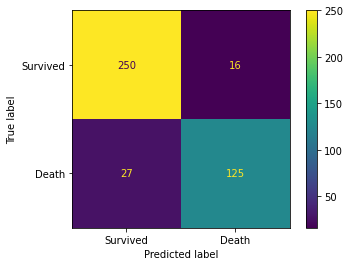

In [ ]:
cm = confusion_matrix(y_test, y_pred)

disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=target_names)
disp.plot();

In [ ]:
print(classification_report(y_test, y_pred, target_names=target_names, digits=3))

              precision    recall  f1-score   support

    Survived      0.903     0.940     0.921       266
       Death      0.887     0.822     0.853       152

    accuracy                          0.897       418
   macro avg      0.895     0.881     0.887       418
weighted avg      0.897     0.897     0.896       418



In [ ]:
temp[0] = [recall_score(y_test, y_pred, average=None)[0], 
           recall_score(y_test, y_pred, average=None)[1],
           recall_score(y_test, y_pred, average=None).sum(),
           accuracy_score(y_test, y_pred)]
temp

array([[0.9398, 0.8224, 1.7622, 0.8971],
       [0.    , 0.    , 0.    , 0.    ],
       [0.    , 0.    , 0.    , 0.    ],
       [0.    , 0.    , 0.    , 0.    ]])

#### Focus on accuracy by tuning z

In [ ]:
c1 = np.zeros((10, 99))

for i in range(1, 11):
    print('The tree numbers =', i * 100)
    model = AdaBoostClassifier(n_estimators = i * 100, random_state=100)
    model.fit(x_train_std, y_train)

    for z in range(zstep, 100, zstep):                       
        y_pred = np.where(model.predict_proba(x_val_std)[:, 1] > z / 100, 1, 0) 

        if z % 10 == 0:
            print(f'The score for z = {z / 100:.2f} is {accuracy_score(y_val, y_pred):.6f}.')
            
        c1[i - 1, int((z - zstep) / zstep)] = accuracy_score(y_val, y_pred)
    
    print()

c2 = np.unravel_index(np.argmax(c1), c1.shape)
print(c2)

print(f'The proper tree numbers and z are {100 * (c2[0] + 1)} and {(c2[1] * zstep + zstep) / 100:.2f}.')

The tree numbers = 100
The score for z = 0.10 is 0.335196.
The score for z = 0.20 is 0.335196.
The score for z = 0.30 is 0.335196.
The score for z = 0.40 is 0.335196.
The score for z = 0.50 is 0.787709.
The score for z = 0.60 is 0.664804.
The score for z = 0.70 is 0.664804.
The score for z = 0.80 is 0.664804.
The score for z = 0.90 is 0.664804.

The tree numbers = 200
The score for z = 0.10 is 0.335196.
The score for z = 0.20 is 0.335196.
The score for z = 0.30 is 0.335196.
The score for z = 0.40 is 0.335196.
The score for z = 0.50 is 0.782123.
The score for z = 0.60 is 0.664804.
The score for z = 0.70 is 0.664804.
The score for z = 0.80 is 0.664804.
The score for z = 0.90 is 0.664804.

The tree numbers = 300
The score for z = 0.10 is 0.335196.
The score for z = 0.20 is 0.335196.
The score for z = 0.30 is 0.335196.
The score for z = 0.40 is 0.335196.
The score for z = 0.50 is 0.765363.
The score for z = 0.60 is 0.664804.
The score for z = 0.70 is 0.664804.
The score for z = 0.80 is 0.6

In [ ]:
c1 = np.zeros((20, 99))

for i in range(1, 21):
    print('The tree numbers =', i * 10)
    model = AdaBoostClassifier(n_estimators = i * 10, random_state=100)
    model.fit(x_train_std, y_train)

    for z in range(zstep, 100, zstep):                       
        y_pred = np.where(model.predict_proba(x_val_std)[:, 1] > z / 100, 1, 0) 

        if z % 10 == 0:
            print(f'The score for z = {z / 100:.2f} is {accuracy_score(y_val, y_pred):.6f}.')
            
        c1[i - 1, int((z - zstep) / zstep)] = accuracy_score(y_val, y_pred)
    
    print()

c2 = np.unravel_index(np.argmax(c1), c1.shape)
print(c2)

print(f'The proper tree numbers and z are {10 * (c2[0] + 1)} and {(c2[1] * zstep + zstep) / 100:.2f}.')

The tree numbers = 10
The score for z = 0.10 is 0.335196.
The score for z = 0.20 is 0.335196.
The score for z = 0.30 is 0.335196.
The score for z = 0.40 is 0.335196.
The score for z = 0.50 is 0.776536.
The score for z = 0.60 is 0.653631.
The score for z = 0.70 is 0.653631.
The score for z = 0.80 is 0.653631.
The score for z = 0.90 is 0.653631.

The tree numbers = 20
The score for z = 0.10 is 0.335196.
The score for z = 0.20 is 0.351955.
The score for z = 0.30 is 0.351955.
The score for z = 0.40 is 0.351955.
The score for z = 0.50 is 0.776536.
The score for z = 0.60 is 0.653631.
The score for z = 0.70 is 0.653631.
The score for z = 0.80 is 0.653631.
The score for z = 0.90 is 0.664804.

The tree numbers = 30
The score for z = 0.10 is 0.335196.
The score for z = 0.20 is 0.335196.
The score for z = 0.30 is 0.346369.
The score for z = 0.40 is 0.346369.
The score for z = 0.50 is 0.765363.
The score for z = 0.60 is 0.659218.
The score for z = 0.70 is 0.659218.
The score for z = 0.80 is 0.6648

In [ ]:
model = AdaBoostClassifier(n_estimators = 10 * (c2[0] + 1), random_state=100)
model.fit(x_train_std, y_train)

y_pred = np.where(model.predict_proba(x_test_std)[:, 1] > (c2[1] * zstep + zstep) / 100, 1, 0)  

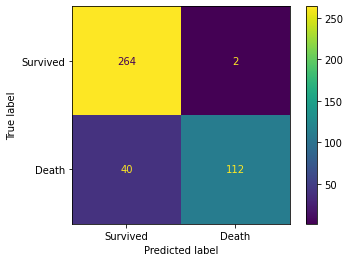

In [ ]:
cm = confusion_matrix(y_test, y_pred)

disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=target_names)
disp.plot();

In [ ]:
print(classification_report(y_test, y_pred, target_names=target_names, digits=3))

              precision    recall  f1-score   support

    Survived      0.868     0.992     0.926       266
       Death      0.982     0.737     0.842       152

    accuracy                          0.900       418
   macro avg      0.925     0.865     0.884       418
weighted avg      0.910     0.900     0.896       418



In [ ]:
temp[1] = [recall_score(y_test, y_pred, average=None)[0], 
           recall_score(y_test, y_pred, average=None)[1],
           recall_score(y_test, y_pred, average=None).sum(),
           accuracy_score(y_test, y_pred)]
temp

array([[0.9398, 0.8224, 1.7622, 0.8971],
       [0.9925, 0.7368, 1.7293, 0.8995],
       [0.    , 0.    , 0.    , 0.    ],
       [0.    , 0.    , 0.    , 0.    ]])

#### Focus on recall

In [ ]:
c1 = []

for i in range(1, 11):
    model =  AdaBoostClassifier(n_estimators = i * 100, random_state=100)
    model.fit(x_train_std, y_train)
    y_pred = model.predict(x_val_std) 
    recall = recall_score(y_val, y_pred, average=None).sum()
    print(f'The recall for tree numbers {i * 100} is {recall:.6f}.')
    c1.append(recall)

print()

c2 = np.argmax(c1)
print(f'The proper tree numbers is {100 * (c2 + 1)}.')

The recall for tree numbers 100 is 1.548459.
The recall for tree numbers 200 is 1.523529.
The recall for tree numbers 300 is 1.481793.
The recall for tree numbers 400 is 1.515126.
The recall for tree numbers 500 is 1.506723.
The recall for tree numbers 600 is 1.490056.
The recall for tree numbers 700 is 1.515126.
The recall for tree numbers 800 is 1.523529.
The recall for tree numbers 900 is 1.523529.
The recall for tree numbers 1000 is 1.523529.

The proper tree numbers is 100.


In [ ]:
c1 = []

for i in range(1, 21):
    model =  AdaBoostClassifier(n_estimators = i * 10, random_state=100)
    model.fit(x_train_std, y_train)
    y_pred = model.predict(x_val_std) 
    recall = recall_score(y_val, y_pred, average=None).sum()
    print(f'The recall for tree numbers {i * 10} is {recall:.6f}.')
    c1.append(recall)

print()

c2 = np.argmax(c1)
print(f'The proper tree numbers is {10 * (c2 + 1)}.')

The recall for tree numbers 10 is 1.539916.
The recall for tree numbers 20 is 1.523389.
The recall for tree numbers 30 is 1.498319.
The recall for tree numbers 40 is 1.498319.
The recall for tree numbers 50 is 1.489916.
The recall for tree numbers 60 is 1.515126.
The recall for tree numbers 70 is 1.531793.
The recall for tree numbers 80 is 1.548319.
The recall for tree numbers 90 is 1.531793.
The recall for tree numbers 100 is 1.548459.
The recall for tree numbers 110 is 1.556723.
The recall for tree numbers 120 is 1.556723.
The recall for tree numbers 130 is 1.565126.
The recall for tree numbers 140 is 1.548459.
The recall for tree numbers 150 is 1.548459.
The recall for tree numbers 160 is 1.531793.
The recall for tree numbers 170 is 1.515126.
The recall for tree numbers 180 is 1.523529.
The recall for tree numbers 190 is 1.523529.
The recall for tree numbers 200 is 1.523529.

The proper tree numbers is 130.


In [ ]:
model = AdaBoostClassifier(n_estimators = 10 * (c2 + 1), random_state=100)
model.fit(x_train_std, y_train)

y_pred = model.predict(x_test_std) 

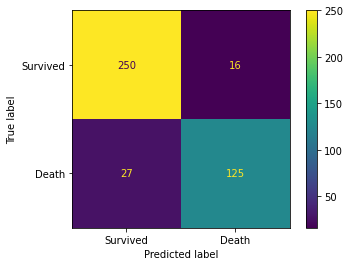

In [ ]:
cm = confusion_matrix(y_test, y_pred)

disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=target_names)
disp.plot();

In [ ]:
print(classification_report(y_test, y_pred, target_names=target_names, digits=3))

              precision    recall  f1-score   support

    Survived      0.903     0.940     0.921       266
       Death      0.887     0.822     0.853       152

    accuracy                          0.897       418
   macro avg      0.895     0.881     0.887       418
weighted avg      0.897     0.897     0.896       418



In [ ]:
temp[2] = [recall_score(y_test, y_pred, average=None)[0], 
           recall_score(y_test, y_pred, average=None)[1],
           recall_score(y_test, y_pred, average=None).sum(),
           accuracy_score(y_test, y_pred)]
temp

array([[0.9398, 0.8224, 1.7622, 0.8971],
       [0.9925, 0.7368, 1.7293, 0.8995],
       [0.9398, 0.8224, 1.7622, 0.8971],
       [0.    , 0.    , 0.    , 0.    ]])

#### Focus on recall by tuning z

In [ ]:
c1 = np.zeros((10, 99))

for i in range(1, 11):
    print('The tree numbers =', i * 100)

    model = AdaBoostClassifier(n_estimators = i * 100, random_state=100)
    model.fit(x_train_std, y_train)

    for z in range(zstep, 100, zstep):                       
        y_pred = np.where(model.predict_proba(x_val_std)[:, 1] > z / 100, 1, 0) 
        recall = recall_score(y_val, y_pred, average=None).sum()

        if z % 10 == 0:
            print(f'The recall for z = {z / 100:.2f} is {recall:.6f}.')
            
        c1[i - 1, int((z - zstep) / zstep)] = recall
    
    print()

c2 = np.unravel_index(np.argmax(c1), c1.shape)
print(c2)

print(f'The proper tree numbers and z are {100 * (c2[0] + 1)} and {(c2[1] * zstep + zstep) / 100:.2f}.')

The tree numbers = 100
The recall for z = 0.10 is 1.000000.
The recall for z = 0.20 is 1.000000.
The recall for z = 0.30 is 1.000000.
The recall for z = 0.40 is 1.000000.
The recall for z = 0.50 is 1.548459.
The recall for z = 0.60 is 1.000000.
The recall for z = 0.70 is 1.000000.
The recall for z = 0.80 is 1.000000.
The recall for z = 0.90 is 1.000000.

The tree numbers = 200
The recall for z = 0.10 is 1.000000.
The recall for z = 0.20 is 1.000000.
The recall for z = 0.30 is 1.000000.
The recall for z = 0.40 is 1.000000.
The recall for z = 0.50 is 1.523529.
The recall for z = 0.60 is 1.000000.
The recall for z = 0.70 is 1.000000.
The recall for z = 0.80 is 1.000000.
The recall for z = 0.90 is 1.000000.

The tree numbers = 300
The recall for z = 0.10 is 1.000000.
The recall for z = 0.20 is 1.000000.
The recall for z = 0.30 is 1.000000.
The recall for z = 0.40 is 1.000000.
The recall for z = 0.50 is 1.481793.
The recall for z = 0.60 is 1.000000.
The recall for z = 0.70 is 1.000000.
The 

In [ ]:
c1 = np.zeros((20, 99))

for i in range(1, 21):
    print('The tree numbers =', i * 10)

    model = AdaBoostClassifier(n_estimators = i * 10, random_state=100)
    model.fit(x_train_std, y_train)

    for z in range(zstep, 100, zstep):                       
        y_pred = np.where(model.predict_proba(x_val_std)[:, 1] > z / 100, 1, 0) 
        recall = recall_score(y_val, y_pred, average=None).sum()

        if z % 10 == 0:
            print(f'The recall for z = {z / 100:.2f} is {recall:.6f}.')
            
        c1[i - 1, int((z - zstep) / zstep)] = recall
    
    print()

c2 = np.unravel_index(np.argmax(c1), c1.shape)
print(c2)

print(f'The proper tree numbers and z are {10 * (c2[0] + 1)} and {(c2[1] * zstep + zstep) / 100:.2f}.')

The tree numbers = 10
The recall for z = 0.10 is 1.000000.
The recall for z = 0.20 is 1.000000.
The recall for z = 0.30 is 1.000000.
The recall for z = 0.40 is 1.000000.
The recall for z = 0.50 is 1.539916.
The recall for z = 0.60 is 0.983193.
The recall for z = 0.70 is 0.983193.
The recall for z = 0.80 is 0.983193.
The recall for z = 0.90 is 0.983193.

The tree numbers = 20
The recall for z = 0.10 is 1.000000.
The recall for z = 0.20 is 1.008683.
The recall for z = 0.30 is 1.008683.
The recall for z = 0.40 is 1.008683.
The recall for z = 0.50 is 1.523389.
The recall for z = 0.60 is 0.983193.
The recall for z = 0.70 is 0.983193.
The recall for z = 0.80 is 0.983193.
The recall for z = 0.90 is 1.000000.

The tree numbers = 30
The recall for z = 0.10 is 1.000000.
The recall for z = 0.20 is 1.000000.
The recall for z = 0.30 is 0.992017.
The recall for z = 0.40 is 0.992017.
The recall for z = 0.50 is 1.498319.
The recall for z = 0.60 is 1.008123.
The recall for z = 0.70 is 1.008123.
The rec

In [ ]:
model = AdaBoostClassifier(n_estimators = 10 * (c2[0] + 1), random_state=100)
model.fit(x_train_std, y_train)

y_pred = np.where(model.predict_proba(x_test_std)[:, 1] > (c2[1] * zstep + zstep) / 100, 1, 0) 

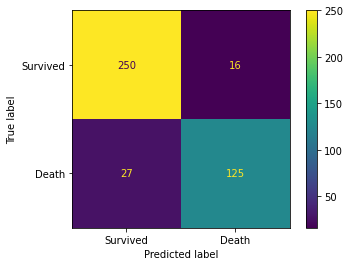

In [ ]:
cm = confusion_matrix(y_test, y_pred)

disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=target_names)
disp.plot();

In [ ]:
print(classification_report(y_test, y_pred, target_names=target_names, digits=3))

              precision    recall  f1-score   support

    Survived      0.903     0.940     0.921       266
       Death      0.887     0.822     0.853       152

    accuracy                          0.897       418
   macro avg      0.895     0.881     0.887       418
weighted avg      0.897     0.897     0.896       418



In [ ]:
temp[3] = [recall_score(y_test, y_pred, average=None)[0], 
           recall_score(y_test, y_pred, average=None)[1],
           recall_score(y_test, y_pred, average=None).sum(),
           accuracy_score(y_test, y_pred)]
temp

array([[0.9398, 0.8224, 1.7622, 0.8971],
       [0.9925, 0.7368, 1.7293, 0.8995],
       [0.9398, 0.8224, 1.7622, 0.8971],
       [0.9398, 0.8224, 1.7622, 0.8971]])

In [ ]:
Result.loc['AdaBoost'] = temp
Result

recall_0  recall_1  recall_sum       acc
Logistic   Ig_im          0.984962  0.480263    1.465226  0.801435
           Ig_im_tun_z    0.890977  0.776316    1.667293  0.849282
           Deal_im        0.823308  0.861842    1.685150  0.837321
           Deal_im_tun_z  0.890977  0.776316    1.667293  0.849282
KNN        Ig_im          0.909774  0.289474    1.199248  0.684211
           Ig_im_tun_z    0.909774  0.289474    1.199248  0.684211
           Deal_im        0.635338  0.532895    1.168233  0.598086
           Deal_im_tun_z  0.488722  0.710526    1.199248  0.569378
GaussianNB Ig_im          0.161654  0.809211    0.970865  0.397129
           Ig_im_tun_z    0.161654  0.809211    0.970865  0.397129
           Deal_im        0.161654  0.809211    0.970865  0.397129
           Deal_im_tun_z  0.161654  0.809211    0.970865  0.397129
DT         Ig_im          0.992481  0.723684    1.716165  0.894737
           Ig_im_tun_z    1.000000  0.526316    1.526316  0.827751
           Deal_im        1.000000  1.000000    2.000000  1.000000
           Deal_im_tun_z  1.000000  1.000000    2.000000  1.000000
RF         Ig_im          0.917293  0.789474    1.706767  0.870813
           Ig_im_tun_z    0.984962  0.631579    1.616541  0.856459
           Deal_im        0.890977  0.802632    1.693609  0.858852
           Deal_im_tun_z  0.872180  0.822368    1.694549  0.854067
Bagging    Ig_im          0.932331  0.730263    1.662594  0.858852
           Ig_im_tun_z    0.962406  0.684211    1.646617  0.861244
           Deal_im        0.913534  0.756579    1.670113  0.856459
           Deal_im_tun_z  0.796992  0.861842    1.658835  0.820574
AdaBoost   Ig_im          0.939850  0.822368    1.762218  0.897129
           Ig_im_tun_z    0.992481  0.736842    1.729323  0.899522
           Deal_im        0.939850  0.822368    1.762218  0.897129
           Deal_im_tun_z  0.939850  0.822368    1.762218  0.897129
XGBBoost   Ig_im          0.000000  0.000000    0.000000  0.000000
           Ig_im_tun_z    0.000000  0.000000    0.000000  0.000000
           Deal_im        0.000000  0.000000    0.000000  0.000000
           Deal_im_tun_z  0.000000  0.000000    0.000000  0.000000
SVM        Ig_im          0.000000  0.000000    0.000000  0.000000
           Ig_im_tun_z    0.000000  0.000000    0.000000  0.000000
           Deal_im        0.000000  0.000000    0.000000  0.000000
           Deal_im_tun_z  0.000000  0.000000    0.000000  0.000000
NN-Scikit  Ig_im          0.000000  0.000000    0.000000  0.000000
           Ig_im_tun_z    0.000000  0.000000    0.000000  0.000000
           Deal_im        0.000000  0.000000    0.000000  0.000000
           Deal_im_tun_z  0.000000  0.000000    0.000000  0.000000
NN-TF      Ig_im          0.000000  0.000000    0.000000  0.000000
           Ig_im_tun_z    0.000000  0.000000    0.000000  0.000000
           Deal_im        0.000000  0.000000    0.000000  0.000000
           Deal_im_tun_z  0.000000  0.000000    0.000000  0.000000

## XGBoost

In [ ]:
temp = np.zeros((4, 4))

#### Focus on accuracy

In [ ]:
c1 = []

for i in range(1, 11):
    model = XGBClassifier(n_estimators=i * 100, random_state=100)
    model.fit(x_train_std, y_train)
    print(f'The score for tree numbers {i * 100} is {model.score(x_val_std, y_val):.6f}.')
    c1.append(model.score(x_val_std, y_val))

print()

c2 = np.argmax(c1)
print(f'The proper tree numbers is {100 * (c2 + 1)}.')

The score for tree numbers 100 is 0.815642.
The score for tree numbers 200 is 0.810056.
The score for tree numbers 300 is 0.810056.
The score for tree numbers 400 is 0.810056.
The score for tree numbers 500 is 0.804469.
The score for tree numbers 600 is 0.798883.
The score for tree numbers 700 is 0.798883.
The score for tree numbers 800 is 0.804469.
The score for tree numbers 900 is 0.804469.
The score for tree numbers 1000 is 0.810056.

The proper tree numbers is 100.


In [ ]:
c1 = []

for i in range(1, 21):
    model = XGBClassifier(n_estimators=i * 10, random_state=100)
    model.fit(x_train_std, y_train)
    print(f'The score for tree numbers {i * 10} is {model.score(x_val_std, y_val):.6f}.')
    c1.append(model.score(x_val_std, y_val))

print()

c2 = np.argmax(c1)
print(f'The proper tree numbers is {10 * (c2 + 1)}.')

The score for tree numbers 10 is 0.821229.
The score for tree numbers 20 is 0.821229.
The score for tree numbers 30 is 0.821229.
The score for tree numbers 40 is 0.821229.
The score for tree numbers 50 is 0.821229.
The score for tree numbers 60 is 0.815642.
The score for tree numbers 70 is 0.815642.
The score for tree numbers 80 is 0.815642.
The score for tree numbers 90 is 0.815642.
The score for tree numbers 100 is 0.815642.
The score for tree numbers 110 is 0.815642.
The score for tree numbers 120 is 0.810056.
The score for tree numbers 130 is 0.810056.
The score for tree numbers 140 is 0.810056.
The score for tree numbers 150 is 0.810056.
The score for tree numbers 160 is 0.810056.
The score for tree numbers 170 is 0.810056.
The score for tree numbers 180 is 0.804469.
The score for tree numbers 190 is 0.804469.
The score for tree numbers 200 is 0.810056.

The proper tree numbers is 10.


In [ ]:
c1 = []

for i in range(1, 21):
    model = XGBClassifier(n_estimators=i * 1, random_state=100)
    model.fit(x_train_std, y_train)
    print(f'The score for tree numbers {i * 1} is {model.score(x_val_std, y_val):.6f}.')
    c1.append(model.score(x_val_std, y_val))

print()

c2 = np.argmax(c1)
print(f'The proper tree numbers is {1 * (c2 + 1)}.')

The score for tree numbers 1 is 0.804469.
The score for tree numbers 2 is 0.804469.
The score for tree numbers 3 is 0.821229.
The score for tree numbers 4 is 0.821229.
The score for tree numbers 5 is 0.821229.
The score for tree numbers 6 is 0.821229.
The score for tree numbers 7 is 0.821229.
The score for tree numbers 8 is 0.821229.
The score for tree numbers 9 is 0.821229.
The score for tree numbers 10 is 0.821229.
The score for tree numbers 11 is 0.821229.
The score for tree numbers 12 is 0.821229.
The score for tree numbers 13 is 0.821229.
The score for tree numbers 14 is 0.821229.
The score for tree numbers 15 is 0.821229.
The score for tree numbers 16 is 0.821229.
The score for tree numbers 17 is 0.821229.
The score for tree numbers 18 is 0.821229.
The score for tree numbers 19 is 0.821229.
The score for tree numbers 20 is 0.821229.

The proper tree numbers is 3.


In [ ]:
model = XGBClassifier(n_estimators = 1 * (c2 + 1), random_state=100)
model.fit(x_train_std, y_train)

y_pred = model.predict(x_test_std) 

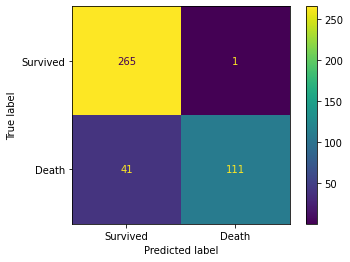

In [ ]:
cm = confusion_matrix(y_test, y_pred)

disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=target_names)
disp.plot();

In [ ]:
print(classification_report(y_test, y_pred, target_names=target_names, digits=3))

              precision    recall  f1-score   support

    Survived      0.866     0.996     0.927       266
       Death      0.991     0.730     0.841       152

    accuracy                          0.900       418
   macro avg      0.929     0.863     0.884       418
weighted avg      0.911     0.900     0.895       418



In [ ]:
importance = pd.DataFrame(model.feature_importances_, index=x_train.columns, columns=['ratio'])
importance[importance.ratio > 1 / len(importance)].sort_values(by='ratio', ascending=False)

,ratio
Sex_female,0.644405
Pclass_3,0.156864
Pclass_1,0.048855
Fare_56.4958,0.045031
Embarked_S,0.042804
Parch_1,0.036326
SibSp_1,0.013457
Fare_30.5,0.011804


In [ ]:
temp[0] = [recall_score(y_test, y_pred, average=None)[0], 
           recall_score(y_test, y_pred, average=None)[1],
           recall_score(y_test, y_pred, average=None).sum(),
           accuracy_score(y_test, y_pred)]
temp

array([[0.9962, 0.7303, 1.7265, 0.8995],
       [0.    , 0.    , 0.    , 0.    ],
       [0.    , 0.    , 0.    , 0.    ],
       [0.    , 0.    , 0.    , 0.    ]])

#### Focus on accuracy by tuning z

In [ ]:
c1 = np.zeros((10, 99))

for i in range(1, 11):
    print('The tree numbers =', i * 100)
    model = XGBClassifier(n_estimators = i * 100, random_state=100)
    model.fit(x_train_std, y_train)

    for z in range(zstep, 100, zstep):                       
        y_pred = np.where(model.predict_proba(x_val_std)[:, 1] > z / 100, 1, 0) 

        if z % 10 == 0:
            print(f'The score for z = {z / 100:.2f} is {accuracy_score(y_val, y_pred):.6f}.')
            
        c1[i - 1, int((z - zstep) / zstep)] = accuracy_score(y_val, y_pred)
    
    print()

c2 = np.unravel_index(np.argmax(c1), c1.shape)
print(c2)

print(f'The proper tree numbers and z are {100 * (c2[0] + 1)} and {(c2[1] * zstep + zstep) / 100:.2f}.')

The tree numbers = 100
The score for z = 0.10 is 0.396648.
The score for z = 0.20 is 0.731844.
The score for z = 0.30 is 0.754190.
The score for z = 0.40 is 0.782123.
The score for z = 0.50 is 0.815642.
The score for z = 0.60 is 0.815642.
The score for z = 0.70 is 0.826816.
The score for z = 0.80 is 0.821229.
The score for z = 0.90 is 0.798883.

The tree numbers = 200
The score for z = 0.10 is 0.491620.
The score for z = 0.20 is 0.731844.
The score for z = 0.30 is 0.770950.
The score for z = 0.40 is 0.776536.
The score for z = 0.50 is 0.810056.
The score for z = 0.60 is 0.821229.
The score for z = 0.70 is 0.821229.
The score for z = 0.80 is 0.810056.
The score for z = 0.90 is 0.798883.

The tree numbers = 300
The score for z = 0.10 is 0.569832.
The score for z = 0.20 is 0.726257.
The score for z = 0.30 is 0.765363.
The score for z = 0.40 is 0.776536.
The score for z = 0.50 is 0.810056.
The score for z = 0.60 is 0.832402.
The score for z = 0.70 is 0.821229.
The score for z = 0.80 is 0.8

In [ ]:
model = XGBClassifier(n_estimators = 100 * (c2[0] + 1), random_state=100)
model.fit(x_train_std, y_train)

y_pred = np.where(model.predict_proba(x_test_std)[:, 1] > (c2[1] * zstep + zstep) / 100, 1, 0) 

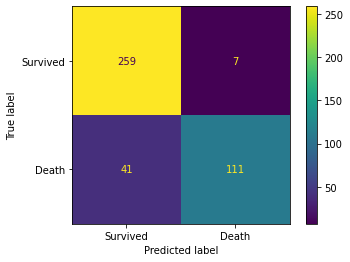

In [ ]:
cm = confusion_matrix(y_test, y_pred)

disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=target_names)
disp.plot();

In [ ]:
print(classification_report(y_test, y_pred, target_names=target_names, digits=3))

              precision    recall  f1-score   support

    Survived      0.863     0.974     0.915       266
       Death      0.941     0.730     0.822       152

    accuracy                          0.885       418
   macro avg      0.902     0.852     0.869       418
weighted avg      0.891     0.885     0.881       418



In [ ]:
importance = pd.DataFrame(model.feature_importances_, index=x_train.columns, columns=['ratio'])
importance[importance.ratio > 1 / len(importance)].sort_values(by='ratio', ascending=False)

,ratio
Sex_female,0.197685
Pclass_3,0.108568
Fare_56.4958,0.079920
Embarked_S,0.046873
Pclass_1,0.031886
Age_4.0,0.027703
Parch_0,0.024911
Embarked_C,0.024902
Age_27.0,0.024574
Age_3.0,0.024156


In [ ]:
temp[1] = [recall_score(y_test, y_pred, average=None)[0], 
           recall_score(y_test, y_pred, average=None)[1],
           recall_score(y_test, y_pred, average=None).sum(),
           accuracy_score(y_test, y_pred)]
temp

array([[0.9962, 0.7303, 1.7265, 0.8995],
       [0.9737, 0.7303, 1.7039, 0.8852],
       [0.    , 0.    , 0.    , 0.    ],
       [0.    , 0.    , 0.    , 0.    ]])

#### Focus on recall

In [ ]:
c1 = []

for i in range(1, 11):
    model =  XGBClassifier(n_estimators = i * 100, random_state=100, scale_pos_weight = (y_train == 0).sum() / (y_train == 1).sum())
    model.fit(x_train_std, y_train)
    y_pred = model.predict(x_val_std) 
    recall = recall_score(y_val, y_pred, average=None).sum()
    print(f'The recall for tree numbers {i * 100} is {recall:.6f}.')
    c1.append(recall)

print()

c2 = np.argmax(c1)
print(f'The proper tree numbers is {100 * (c2 + 1)}.')

The recall for tree numbers 100 is 1.556863.
The recall for tree numbers 200 is 1.590196.
The recall for tree numbers 300 is 1.606863.
The recall for tree numbers 400 is 1.573529.
The recall for tree numbers 500 is 1.590196.
The recall for tree numbers 600 is 1.590196.
The recall for tree numbers 700 is 1.590196.
The recall for tree numbers 800 is 1.598599.
The recall for tree numbers 900 is 1.598599.
The recall for tree numbers 1000 is 1.581793.

The proper tree numbers is 300.


In [ ]:
model = XGBClassifier(n_estimators = 100 * (c2 + 1), random_state=100, scale_pos_weight = (y_train == 0).sum() / (y_train == 1).sum())
model.fit(x_train_std, y_train)

y_pred = model.predict(x_test_std) 

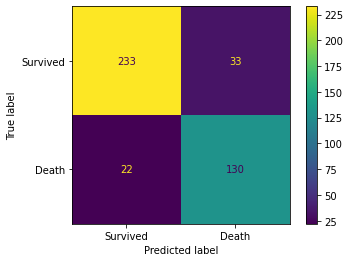

In [ ]:
cm = confusion_matrix(y_test, y_pred)

disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=target_names)
disp.plot();

In [ ]:
print(classification_report(y_test, y_pred, target_names=target_names, digits=3))

              precision    recall  f1-score   support

    Survived      0.914     0.876     0.894       266
       Death      0.798     0.855     0.825       152

    accuracy                          0.868       418
   macro avg      0.856     0.866     0.860       418
weighted avg      0.871     0.868     0.869       418



In [ ]:
importance = pd.DataFrame(model.feature_importances_, index=x_train.columns, columns=['ratio'])
importance[importance.ratio > 1 / len(importance)].sort_values(by='ratio', ascending=False)

,ratio
Sex_female,0.171421
Pclass_3,0.076750
Fare_56.4958,0.041208
Pclass_1,0.038349
Parch_0,0.036461
...,...
Age_38.0,0.003252
Age_22.0,0.003044
Fare_7.775,0.003035
Age_19.0,0.002850


In [ ]:
temp[2] = [recall_score(y_test, y_pred, average=None)[0], 
           recall_score(y_test, y_pred, average=None)[1],
           recall_score(y_test, y_pred, average=None).sum(),
           accuracy_score(y_test, y_pred)]
temp

array([[0.9962, 0.7303, 1.7265, 0.8995],
       [0.9737, 0.7303, 1.7039, 0.8852],
       [0.8759, 0.8553, 1.7312, 0.8684],
       [0.    , 0.    , 0.    , 0.    ]])

#### Focus on recall by tuning z

In [ ]:
c1 = np.zeros((10, 99))

for i in range(1, 11):
    print('The tree numbers =', i * 100)

    model = XGBClassifier(n_estimators = i * 100, random_state=100, scale_pos_weight = (y_train == 0).sum() / (y_train == 1).sum())
    model.fit(x_train_std, y_train)

    for z in range(zstep, 100, zstep):                       
        y_pred = np.where(model.predict_proba(x_val_std)[:, 1] > z / 100, 1, 0) 
        recall = recall_score(y_val, y_pred, average=None).sum()

        if z % 10 == 0:
            print(f'The recall for z = {z / 100:.2f} is {recall:.6f}.')
            
        c1[i - 1, int((z - zstep) / zstep)] = recall
    
    print()

c2 = np.unravel_index(np.argmax(c1), c1.shape)
print(c2)

print(f'The proper tree numbers and z are {100 * (c2[0] + 1)} and {(c2[1] * zstep + zstep) / 100:.2f}.')

The tree numbers = 100
The recall for z = 0.10 is 1.058824.
The recall for z = 0.20 is 1.386975.
The recall for z = 0.30 is 1.522409.
The recall for z = 0.40 is 1.564566.
The recall for z = 0.50 is 1.556863.
The recall for z = 0.60 is 1.532633.
The recall for z = 0.70 is 1.541036.
The recall for z = 0.80 is 1.483053.
The recall for z = 0.90 is 1.458123.

The tree numbers = 200
The recall for z = 0.10 is 1.117787.
The recall for z = 0.20 is 1.496359.
The recall for z = 0.30 is 1.514146.
The recall for z = 0.40 is 1.564706.
The recall for z = 0.50 is 1.590196.
The recall for z = 0.60 is 1.532353.
The recall for z = 0.70 is 1.549440.
The recall for z = 0.80 is 1.516246.
The recall for z = 0.90 is 1.458123.

The tree numbers = 300
The recall for z = 0.10 is 1.159944.
The recall for z = 0.20 is 1.438095.
The recall for z = 0.30 is 1.514146.
The recall for z = 0.40 is 1.581513.
The recall for z = 0.50 is 1.606863.
The recall for z = 0.60 is 1.582353.
The recall for z = 0.70 is 1.549160.
The 

In [ ]:
model = XGBClassifier(n_estimators = 100 * (c2[0] + 1), random_state=100, scale_pos_weight = (y_train == 0).sum() / (y_train == 1).sum())
model.fit(x_train_std, y_train)

y_pred = np.where(model.predict_proba(x_test_std)[:, 1] > (c2[1] * zstep + zstep) / 100, 1, 0) 

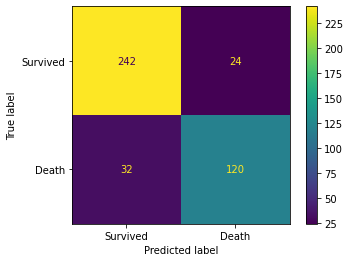

In [ ]:
cm = confusion_matrix(y_test, y_pred)

disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=target_names)
disp.plot();

In [ ]:
print(classification_report(y_test, y_pred, target_names=target_names, digits=3))

              precision    recall  f1-score   support

    Survived      0.883     0.910     0.896       266
       Death      0.833     0.789     0.811       152

    accuracy                          0.866       418
   macro avg      0.858     0.850     0.854       418
weighted avg      0.865     0.866     0.865       418



In [ ]:
importance = pd.DataFrame(model.feature_importances_, index=x_train.columns, columns=['ratio'])
importance[importance.ratio > 1 / len(importance)].sort_values(by='ratio', ascending=False)

,ratio
Sex_female,0.133114
Fare_56.4958,0.061453
Pclass_3,0.056047
Age_3.0,0.038176
Fare_12.475,0.035194
...,...
Fare_26.55,0.003066
Age_34.0,0.002987
Fare_7.775,0.002906
Age_19.0,0.002878


In [ ]:
temp[3] = [recall_score(y_test, y_pred, average=None)[0], 
           recall_score(y_test, y_pred, average=None)[1],
           recall_score(y_test, y_pred, average=None).sum(),
           accuracy_score(y_test, y_pred)]

temp

array([[0.9962, 0.7303, 1.7265, 0.8995],
       [0.9737, 0.7303, 1.7039, 0.8852],
       [0.8759, 0.8553, 1.7312, 0.8684],
       [0.9098, 0.7895, 1.6992, 0.866 ]])

In [ ]:
Result.loc['XGBBoost'] = temp
Result

recall_0  recall_1  recall_sum       acc
Logistic   Ig_im          0.984962  0.480263    1.465226  0.801435
           Ig_im_tun_z    0.890977  0.776316    1.667293  0.849282
           Deal_im        0.823308  0.861842    1.685150  0.837321
           Deal_im_tun_z  0.890977  0.776316    1.667293  0.849282
KNN        Ig_im          0.909774  0.289474    1.199248  0.684211
           Ig_im_tun_z    0.909774  0.289474    1.199248  0.684211
           Deal_im        0.635338  0.532895    1.168233  0.598086
           Deal_im_tun_z  0.488722  0.710526    1.199248  0.569378
GaussianNB Ig_im          0.161654  0.809211    0.970865  0.397129
           Ig_im_tun_z    0.161654  0.809211    0.970865  0.397129
           Deal_im        0.161654  0.809211    0.970865  0.397129
           Deal_im_tun_z  0.161654  0.809211    0.970865  0.397129
DT         Ig_im          0.992481  0.723684    1.716165  0.894737
           Ig_im_tun_z    1.000000  0.526316    1.526316  0.827751
           Deal_im        1.000000  1.000000    2.000000  1.000000
           Deal_im_tun_z  1.000000  1.000000    2.000000  1.000000
RF         Ig_im          0.917293  0.789474    1.706767  0.870813
           Ig_im_tun_z    0.984962  0.631579    1.616541  0.856459
           Deal_im        0.890977  0.802632    1.693609  0.858852
           Deal_im_tun_z  0.872180  0.822368    1.694549  0.854067
Bagging    Ig_im          0.932331  0.730263    1.662594  0.858852
           Ig_im_tun_z    0.962406  0.684211    1.646617  0.861244
           Deal_im        0.913534  0.756579    1.670113  0.856459
           Deal_im_tun_z  0.796992  0.861842    1.658835  0.820574
AdaBoost   Ig_im          0.939850  0.822368    1.762218  0.897129
           Ig_im_tun_z    0.992481  0.736842    1.729323  0.899522
           Deal_im        0.939850  0.822368    1.762218  0.897129
           Deal_im_tun_z  0.939850  0.822368    1.762218  0.897129
XGBBoost   Ig_im          0.996241  0.730263    1.726504  0.899522
           Ig_im_tun_z    0.973684  0.730263    1.703947  0.885167
           Deal_im        0.875940  0.855263    1.731203  0.868421
           Deal_im_tun_z  0.909774  0.789474    1.699248  0.866029
SVM        Ig_im          0.000000  0.000000    0.000000  0.000000
           Ig_im_tun_z    0.000000  0.000000    0.000000  0.000000
           Deal_im        0.000000  0.000000    0.000000  0.000000
           Deal_im_tun_z  0.000000  0.000000    0.000000  0.000000
NN-Scikit  Ig_im          0.000000  0.000000    0.000000  0.000000
           Ig_im_tun_z    0.000000  0.000000    0.000000  0.000000
           Deal_im        0.000000  0.000000    0.000000  0.000000
           Deal_im_tun_z  0.000000  0.000000    0.000000  0.000000
NN-TF      Ig_im          0.000000  0.000000    0.000000  0.000000
           Ig_im_tun_z    0.000000  0.000000    0.000000  0.000000
           Deal_im        0.000000  0.000000    0.000000  0.000000
           Deal_im_tun_z  0.000000  0.000000    0.000000  0.000000

## Support Vector Machine

In [ ]:
temp = np.zeros((4, 4))

#### Focus on accuracy

In [ ]:
c1 = []

for i in range(-4, 5):
    model = SVC(C = 10 ** i, random_state=100)
    model.fit(x_train_std, y_train)
    print(f'The score for C = {10 ** i} is {model.score(x_val_std, y_val):.6f}.')
    c1.append(model.score(x_val_std, y_val))

print()

c2 = np.argmax(c1)
print(f'The proper C is {10 ** (int(c2) - 4)}.')

The score for C = 0.0001 is 0.664804.
The score for C = 0.001 is 0.664804.
The score for C = 0.01 is 0.664804.
The score for C = 0.1 is 0.664804.
The score for C = 1 is 0.787709.
The score for C = 10 is 0.798883.
The score for C = 100 is 0.793296.
The score for C = 1000 is 0.782123.
The score for C = 10000 is 0.782123.

The proper C is 10.


In [ ]:
model = SVC(C = 10 ** (int(c2) - 4), random_state=100)
model.fit(x_train_std, y_train)

y_pred = model.predict(x_test_std) 

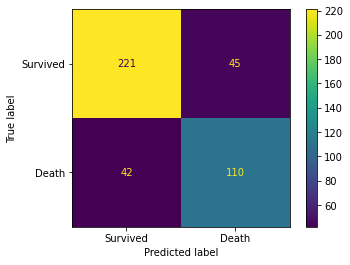

In [ ]:
cm = confusion_matrix(y_test, y_pred)

disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=target_names)
disp.plot();

In [ ]:
print(classification_report(y_test, y_pred, target_names=target_names, digits=3))

              precision    recall  f1-score   support

    Survived      0.840     0.831     0.836       266
       Death      0.710     0.724     0.717       152

    accuracy                          0.792       418
   macro avg      0.775     0.777     0.776       418
weighted avg      0.793     0.792     0.792       418



In [ ]:
temp[0] = [recall_score(y_test, y_pred, average=None)[0], 
           recall_score(y_test, y_pred, average=None)[1],
           recall_score(y_test, y_pred, average=None).sum(),
           accuracy_score(y_test, y_pred)]
temp

array([[0.8308, 0.7237, 1.5545, 0.7919],
       [0.    , 0.    , 0.    , 0.    ],
       [0.    , 0.    , 0.    , 0.    ],
       [0.    , 0.    , 0.    , 0.    ]])

#### Focus on accuracy by tuning z

In [ ]:
c1 = np.zeros((9, 99))

for i in range(-4, 5):
    print('C =', 10 ** i)

    model = SVC(C = 10 ** i, random_state=100, probability=True)
    model.fit(x_train_std, y_train)

    for z in range(zstep, 100, zstep):                       
        y_pred = np.where(model.predict_proba(x_val_std)[:, 1] > z / 100, 1, 0) 

        if z % 10 == 0:
            print(f'The score for z = {z / 100:.2f} is {accuracy_score(y_val, y_pred):.6f}.')

        c1[i + 4, int((z - zstep) / zstep)] = accuracy_score(y_val, y_pred)
    
    print()

c2 = np.unravel_index(np.argmax(c1), c1.shape)
print(c2)

print(f'The proper C and z are {10 ** (int(c2[0]) - 4)} and {(c2[1] * zstep + zstep) / 100:.2f}.')

C = 0.0001
The score for z = 0.10 is 0.335196.
The score for z = 0.20 is 0.335196.
The score for z = 0.30 is 0.335196.
The score for z = 0.40 is 0.754190.
The score for z = 0.50 is 0.670391.
The score for z = 0.60 is 0.664804.
The score for z = 0.70 is 0.664804.
The score for z = 0.80 is 0.664804.
The score for z = 0.90 is 0.664804.

C = 0.001
The score for z = 0.10 is 0.418994.
The score for z = 0.20 is 0.586592.
The score for z = 0.30 is 0.681564.
The score for z = 0.40 is 0.737430.
The score for z = 0.50 is 0.754190.
The score for z = 0.60 is 0.798883.
The score for z = 0.70 is 0.770950.
The score for z = 0.80 is 0.754190.
The score for z = 0.90 is 0.726257.

C = 0.01
The score for z = 0.10 is 0.474860.
The score for z = 0.20 is 0.692737.
The score for z = 0.30 is 0.726257.
The score for z = 0.40 is 0.793296.
The score for z = 0.50 is 0.798883.
The score for z = 0.60 is 0.782123.
The score for z = 0.70 is 0.759777.
The score for z = 0.80 is 0.726257.
The score for z = 0.90 is 0.7094

In [ ]:
model = SVC(C = 10 ** (int(c2[0]) - 4), random_state=100, probability=True)
model.fit(x_train_std, y_train)

y_pred = np.where(model.predict_proba(x_test_std)[:, 1] > (c2[1] * zstep + zstep) / 100, 1, 0) 

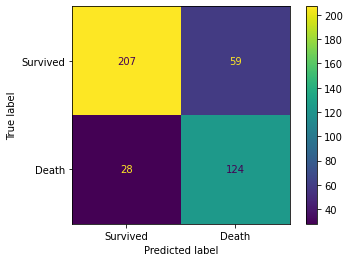

In [ ]:
cm = confusion_matrix(y_test, y_pred)

disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=target_names)
disp.plot();

In [ ]:
print(classification_report(y_test, y_pred, target_names=target_names, digits=3))

              precision    recall  f1-score   support

    Survived      0.881     0.778     0.826       266
       Death      0.678     0.816     0.740       152

    accuracy                          0.792       418
   macro avg      0.779     0.797     0.783       418
weighted avg      0.807     0.792     0.795       418



In [ ]:
temp[1] = [recall_score(y_test, y_pred, average=None)[0], 
           recall_score(y_test, y_pred, average=None)[1],
           recall_score(y_test, y_pred, average=None).sum(),
           accuracy_score(y_test, y_pred)]
temp

array([[0.8308, 0.7237, 1.5545, 0.7919],
       [0.7782, 0.8158, 1.594 , 0.7919],
       [0.    , 0.    , 0.    , 0.    ],
       [0.    , 0.    , 0.    , 0.    ]])

#### Focus on recall

In [ ]:
c1 = []

for i in range(-4, 5):
    model = SVC(C = 10 ** i, random_state=100, class_weight='balanced')
    model.fit(x_train_std, y_train)
    y_pred = model.predict(x_val_std) 
    recall = recall_score(y_val, y_pred, average=None).sum()
    print(f'The recall for C = {10 ** i} is {recall:.6f}.')
    c1.append(recall)
    
print()

c2 = np.argmax(c1)
print(f'The proper C is {10 ** (int(c2) - 4)}.')

The recall for C = 0.0001 is 1.000000.
The recall for C = 0.001 is 1.000000.
The recall for C = 0.01 is 1.000000.
The recall for C = 0.1 is 1.321849.
The recall for C = 1 is 1.606723.
The recall for C = 10 is 1.606863.
The recall for C = 100 is 1.589916.
The recall for C = 1000 is 1.556583.
The recall for C = 10000 is 1.556583.

The proper C is 10.


In [ ]:
model = SVC(C = 10 ** (int(c2) - 4), random_state=100, class_weight='balanced')
model.fit(x_train_std, y_train)

y_pred = model.predict(x_test_std) 

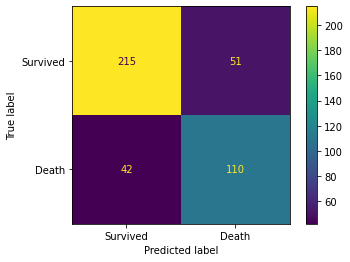

In [ ]:
cm = confusion_matrix(y_test, y_pred)

disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=target_names)
disp.plot();

In [ ]:
print(classification_report(y_test, y_pred, target_names=target_names, digits=3))

              precision    recall  f1-score   support

    Survived      0.837     0.808     0.822       266
       Death      0.683     0.724     0.703       152

    accuracy                          0.778       418
   macro avg      0.760     0.766     0.763       418
weighted avg      0.781     0.778     0.779       418



In [ ]:
temp[2] = [recall_score(y_test, y_pred, average=None)[0], 
           recall_score(y_test, y_pred, average=None)[1],
           recall_score(y_test, y_pred, average=None).sum(),
           accuracy_score(y_test, y_pred)]
temp

array([[0.8308, 0.7237, 1.5545, 0.7919],
       [0.7782, 0.8158, 1.594 , 0.7919],
       [0.8083, 0.7237, 1.532 , 0.7775],
       [0.    , 0.    , 0.    , 0.    ]])

#### Focus on recall by tuning z

In [ ]:
c1 = np.zeros((9, 99))

for i in range(-4, 5):
    print('C =', 10 ** i)

    model = SVC(C = 10 ** i, random_state=100, class_weight='balanced', probability=True)
    model.fit(x_train_std, y_train)

    for z in range(zstep, 100, zstep):                       
        y_pred = np.where(model.predict_proba(x_val_std)[:, 1] > z / 100, 1, 0) 
        recall = recall_score(y_val, y_pred, average=None).sum()

        if z % 10 ==0:
            print(f'The recall for z = {z / 100:.2f} is {recall:.6f}.')
            
        c1[i + 4, int((z - zstep) / zstep)] = recall
    
    print()

c2 = np.unravel_index(np.argmax(c1), c1.shape)
print(c2)

print(f'The proper C and z are {10 ** (int(c2[0]) - 4)} and {(c2[1] * zstep + zstep) / 100:.2f}.')

C = 0.0001
The recall for z = 0.10 is 1.000000.
The recall for z = 0.20 is 1.000000.
The recall for z = 0.30 is 1.000000.
The recall for z = 0.40 is 1.000000.
The recall for z = 0.50 is 1.000000.
The recall for z = 0.60 is 1.000000.
The recall for z = 0.70 is 1.000000.
The recall for z = 0.80 is 1.000000.
The recall for z = 0.90 is 1.000000.

C = 0.001
The recall for z = 0.10 is 1.000000.
The recall for z = 0.20 is 1.000000.
The recall for z = 0.30 is 1.000000.
The recall for z = 0.40 is 1.000000.
The recall for z = 0.50 is 1.000000.
The recall for z = 0.60 is 1.000000.
The recall for z = 0.70 is 1.000000.
The recall for z = 0.80 is 1.000000.
The recall for z = 0.90 is 1.000000.

C = 0.01
The recall for z = 0.10 is 1.000000.
The recall for z = 0.20 is 1.000000.
The recall for z = 0.30 is 1.000000.
The recall for z = 0.40 is 1.000000.
The recall for z = 0.50 is 1.000000.
The recall for z = 0.60 is 1.000000.
The recall for z = 0.70 is 1.000000.
The recall for z = 0.80 is 1.000000.
The re

In [ ]:
model = SVC(C = 10 ** (int(c2[0]) - 4), random_state=100, class_weight='balanced', probability=True)
model.fit(x_train_std, y_train)

y_pred = np.where(model.predict_proba(x_test_std)[:, 1] > (c2[1] * zstep + zstep) / 100, 1, 0) 

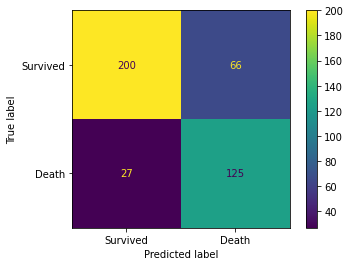

In [ ]:
cm = confusion_matrix(y_test, y_pred)

disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=target_names)
disp.plot();

In [ ]:
print(classification_report(y_test, y_pred, target_names=target_names, digits=3))

              precision    recall  f1-score   support

    Survived      0.881     0.752     0.811       266
       Death      0.654     0.822     0.729       152

    accuracy                          0.778       418
   macro avg      0.768     0.787     0.770       418
weighted avg      0.799     0.778     0.781       418



In [ ]:
temp[3] = [recall_score(y_test, y_pred, average=None)[0], 
           recall_score(y_test, y_pred, average=None)[1],
           recall_score(y_test, y_pred, average=None).sum(),
           accuracy_score(y_test, y_pred)]
temp

array([[0.8308, 0.7237, 1.5545, 0.7919],
       [0.7782, 0.8158, 1.594 , 0.7919],
       [0.8083, 0.7237, 1.532 , 0.7775],
       [0.7519, 0.8224, 1.5742, 0.7775]])

In [ ]:
Result.loc['SVM'] = temp
Result

recall_0  recall_1  recall_sum       acc
Logistic   Ig_im          0.984962  0.480263    1.465226  0.801435
           Ig_im_tun_z    0.890977  0.776316    1.667293  0.849282
           Deal_im        0.823308  0.861842    1.685150  0.837321
           Deal_im_tun_z  0.890977  0.776316    1.667293  0.849282
KNN        Ig_im          0.909774  0.289474    1.199248  0.684211
           Ig_im_tun_z    0.909774  0.289474    1.199248  0.684211
           Deal_im        0.635338  0.532895    1.168233  0.598086
           Deal_im_tun_z  0.488722  0.710526    1.199248  0.569378
GaussianNB Ig_im          0.161654  0.809211    0.970865  0.397129
           Ig_im_tun_z    0.161654  0.809211    0.970865  0.397129
           Deal_im        0.161654  0.809211    0.970865  0.397129
           Deal_im_tun_z  0.161654  0.809211    0.970865  0.397129
DT         Ig_im          0.992481  0.723684    1.716165  0.894737
           Ig_im_tun_z    1.000000  0.526316    1.526316  0.827751
           Deal_im        1.000000  1.000000    2.000000  1.000000
           Deal_im_tun_z  1.000000  1.000000    2.000000  1.000000
RF         Ig_im          0.917293  0.789474    1.706767  0.870813
           Ig_im_tun_z    0.984962  0.631579    1.616541  0.856459
           Deal_im        0.890977  0.802632    1.693609  0.858852
           Deal_im_tun_z  0.872180  0.822368    1.694549  0.854067
Bagging    Ig_im          0.932331  0.730263    1.662594  0.858852
           Ig_im_tun_z    0.962406  0.684211    1.646617  0.861244
           Deal_im        0.913534  0.756579    1.670113  0.856459
           Deal_im_tun_z  0.796992  0.861842    1.658835  0.820574
AdaBoost   Ig_im          0.939850  0.822368    1.762218  0.897129
           Ig_im_tun_z    0.992481  0.736842    1.729323  0.899522
           Deal_im        0.939850  0.822368    1.762218  0.897129
           Deal_im_tun_z  0.939850  0.822368    1.762218  0.897129
XGBBoost   Ig_im          0.996241  0.730263    1.726504  0.899522
           Ig_im_tun_z    0.973684  0.730263    1.703947  0.885167
           Deal_im        0.875940  0.855263    1.731203  0.868421
           Deal_im_tun_z  0.909774  0.789474    1.699248  0.866029
SVM        Ig_im          0.830827  0.723684    1.554511  0.791866
           Ig_im_tun_z    0.778195  0.815789    1.593985  0.791866
           Deal_im        0.808271  0.723684    1.531955  0.777512
           Deal_im_tun_z  0.751880  0.822368    1.574248  0.777512
NN-Scikit  Ig_im          0.000000  0.000000    0.000000  0.000000
           Ig_im_tun_z    0.000000  0.000000    0.000000  0.000000
           Deal_im        0.000000  0.000000    0.000000  0.000000
           Deal_im_tun_z  0.000000  0.000000    0.000000  0.000000
NN-TF      Ig_im          0.000000  0.000000    0.000000  0.000000
           Ig_im_tun_z    0.000000  0.000000    0.000000  0.000000
           Deal_im        0.000000  0.000000    0.000000  0.000000
           Deal_im_tun_z  0.000000  0.000000    0.000000  0.000000

## Neutral Network - Scikit

In [ ]:
temp = np.zeros((4, 4))

#### Focus on accuracy

In [ ]:
c1 = []

for i in range(1, 11):
    model = MLPClassifier(hidden_layer_sizes= i * [100], random_state=100)
    model.fit(x_train_std, y_train)
    print(f'The score for {i} hidden layer(s) is {model.score(x_val_std, y_val):.6f}.')
    c1.append(model.score(x_val_std, y_val))  
    
print()

c2 = np.argmax(c1)
print(f'The proper number of hidden layer(s) is {c2 + 1}.')

The score for 1 hidden layer(s) is 0.770950.
The score for 2 hidden layer(s) is 0.770950.
The score for 3 hidden layer(s) is 0.770950.
The score for 4 hidden layer(s) is 0.765363.
The score for 5 hidden layer(s) is 0.776536.
The score for 6 hidden layer(s) is 0.776536.
The score for 7 hidden layer(s) is 0.787709.
The score for 8 hidden layer(s) is 0.776536.
The score for 9 hidden layer(s) is 0.782123.
The score for 10 hidden layer(s) is 0.787709.

The proper number of hidden layer(s) is 7.


In [ ]:
model = MLPClassifier(hidden_layer_sizes= (c2 + 1) * [100], random_state=100)
model.fit(x_train_std, y_train)

y_pred = model.predict(x_test_std) 

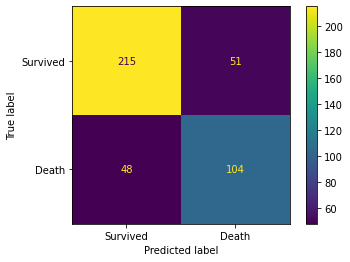

In [ ]:
cm = confusion_matrix(y_test, y_pred)

disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=target_names)
disp.plot();

In [ ]:
print(classification_report(y_test, y_pred, target_names=target_names, digits=3))

              precision    recall  f1-score   support

    Survived      0.817     0.808     0.813       266
       Death      0.671     0.684     0.678       152

    accuracy                          0.763       418
   macro avg      0.744     0.746     0.745       418
weighted avg      0.764     0.763     0.764       418



In [ ]:
temp[0] = [recall_score(y_test, y_pred, average=None)[0], 
           recall_score(y_test, y_pred, average=None)[1],
           recall_score(y_test, y_pred, average=None).sum(),
           accuracy_score(y_test, y_pred)]
temp

array([[0.8083, 0.6842, 1.4925, 0.7632],
       [0.    , 0.    , 0.    , 0.    ],
       [0.    , 0.    , 0.    , 0.    ],
       [0.    , 0.    , 0.    , 0.    ]])

#### Focus on accuracy by tuning z

In [ ]:
c1 = np.zeros((10, 99))

for i in range(1, 11):
    print('The number of hidden layer(s) =', i)

    model = MLPClassifier(hidden_layer_sizes= i * [100], random_state=100)
    model.fit(x_train_std, y_train)

    for z in range(zstep, 100, zstep):                       
        y_pred = np.where(model.predict_proba(x_val_std)[:, 1] > z / 100, 1, 0) 

        if z % 10 == 0:
            print(f'The score for z = {z / 100:.2f} is {accuracy_score(y_val, y_pred):.6f}.')
            
        c1[i - 1, int((z - zstep) / zstep)] = accuracy_score(y_val, y_pred)
    
    print()

c2 = np.unravel_index(np.argmax(c1), c1.shape)
print(c2)

print(f'The proper number of hidden layer(s) and z are {c2[0] + 1} and {(c2[1] * zstep + zstep) / 100:.2f}.')

The number of hidden layer(s) = 1
The score for z = 0.10 is 0.709497.
The score for z = 0.20 is 0.759777.
The score for z = 0.30 is 0.770950.
The score for z = 0.40 is 0.770950.
The score for z = 0.50 is 0.770950.
The score for z = 0.60 is 0.770950.
The score for z = 0.70 is 0.782123.
The score for z = 0.80 is 0.776536.
The score for z = 0.90 is 0.776536.

The number of hidden layer(s) = 2
The score for z = 0.10 is 0.720670.
The score for z = 0.20 is 0.765363.
The score for z = 0.30 is 0.765363.
The score for z = 0.40 is 0.770950.
The score for z = 0.50 is 0.770950.
The score for z = 0.60 is 0.776536.
The score for z = 0.70 is 0.770950.
The score for z = 0.80 is 0.770950.
The score for z = 0.90 is 0.770950.

The number of hidden layer(s) = 3
The score for z = 0.10 is 0.720670.
The score for z = 0.20 is 0.754190.
The score for z = 0.30 is 0.759777.
The score for z = 0.40 is 0.770950.
The score for z = 0.50 is 0.770950.
The score for z = 0.60 is 0.770950.
The score for z = 0.70 is 0.7709

In [ ]:
model = MLPClassifier(hidden_layer_sizes= (c2[0] + 1) * [100], random_state=100)
model.fit(x_train_std, y_train)

y_pred = np.where(model.predict_proba(x_test_std)[:, 1] > (c2[1] * zstep + zstep) / 100, 1, 0) 

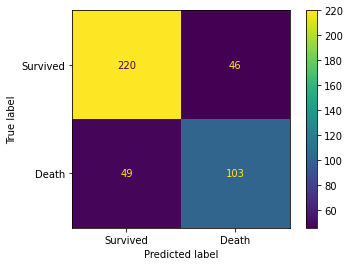

In [ ]:
cm = confusion_matrix(y_test, y_pred)

disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=target_names)
disp.plot();

In [ ]:
print(classification_report(y_test, y_pred, target_names=target_names, digits=3))

              precision    recall  f1-score   support

    Survived      0.818     0.827     0.822       266
       Death      0.691     0.678     0.684       152

    accuracy                          0.773       418
   macro avg      0.755     0.752     0.753       418
weighted avg      0.772     0.773     0.772       418



In [ ]:
temp[1] = [recall_score(y_test, y_pred, average=None)[0], 
           recall_score(y_test, y_pred, average=None)[1],
           recall_score(y_test, y_pred, average=None).sum(),
           accuracy_score(y_test, y_pred)]
temp

array([[0.8083, 0.6842, 1.4925, 0.7632],
       [0.8271, 0.6776, 1.5047, 0.7727],
       [0.    , 0.    , 0.    , 0.    ],
       [0.    , 0.    , 0.    , 0.    ]])

#### Focus on recall

In [ ]:
c1 = []

for i in range(1, 11):
    model = MLPClassifier(hidden_layer_sizes= i * [100], random_state=100)
    model.fit(x_train_std, y_train)
    y_pred = model.predict(x_val_std) 
    recall = recall_score(y_val, y_pred, average=None).sum()
    print(f'The recall for {i} hidden layer(s) is {recall:.6f}.')
    c1.append(recall)  
    
print()

c2 = np.argmax(c1)
print(f'The proper number of hidden layer(s) is {c2 + 1}.')

The recall for 1 hidden layer(s) is 1.506723.
The recall for 2 hidden layer(s) is 1.531513.
The recall for 3 hidden layer(s) is 1.514986.
The recall for 4 hidden layer(s) is 1.523109.
The recall for 5 hidden layer(s) is 1.531653.
The recall for 6 hidden layer(s) is 1.531653.
The recall for 7 hidden layer(s) is 1.548459.
The recall for 8 hidden layer(s) is 1.523389.
The recall for 9 hidden layer(s) is 1.523529.
The recall for 10 hidden layer(s) is 1.540196.

The proper number of hidden layer(s) is 7.


In [ ]:
model = MLPClassifier(hidden_layer_sizes= (c2 + 1) * [100], random_state=100)
model.fit(x_train_std, y_train)

y_pred = model.predict(x_test_std) 

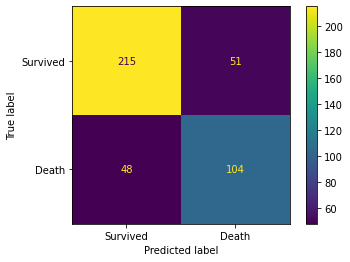

In [ ]:
cm = confusion_matrix(y_test, y_pred)

disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=target_names)
disp.plot();

In [ ]:
print(classification_report(y_test, y_pred, target_names=target_names, digits=3))

              precision    recall  f1-score   support

    Survived      0.817     0.808     0.813       266
       Death      0.671     0.684     0.678       152

    accuracy                          0.763       418
   macro avg      0.744     0.746     0.745       418
weighted avg      0.764     0.763     0.764       418



In [ ]:
temp[2] = [recall_score(y_test, y_pred, average=None)[0], 
           recall_score(y_test, y_pred, average=None)[1],
           recall_score(y_test, y_pred, average=None).sum(),
           accuracy_score(y_test, y_pred)]
temp

array([[0.8083, 0.6842, 1.4925, 0.7632],
       [0.8271, 0.6776, 1.5047, 0.7727],
       [0.8083, 0.6842, 1.4925, 0.7632],
       [0.    , 0.    , 0.    , 0.    ]])

#### Focus on recall by tuning z

In [ ]:
c1 = np.zeros((10, 99))

for i in range(1, 11):
    print('The number of hidden layer(s) =', i)

    model = MLPClassifier(hidden_layer_sizes= i * [100], random_state=100)
    model.fit(x_train_std, y_train)

    for z in range(zstep, 100, zstep):                       
        y_pred = np.where(model.predict_proba(x_val_std)[:, 1] > z / 100, 1, 0) 
        recall = recall_score(y_val, y_pred, average=None).sum()

        if z % 10 ==0:
            print(f'The recall for z = {z / 100:.2f} is {recall:.6f}.')

        c1[i - 1, int((z - zstep) / zstep)] = recall
    
    print()

c2 = np.unravel_index(np.argmax(c1), c1.shape)
print(c2)

print(f'The proper number of hidden layer(s) and z are {c2[0] + 1} and {(c2[1] * zstep + zstep) / 100:.2f}.')

The number of hidden layer(s) = 1
The recall for z = 0.10 is 1.447339.
The recall for z = 0.20 is 1.506443.
The recall for z = 0.30 is 1.514986.
The recall for z = 0.40 is 1.514986.
The recall for z = 0.50 is 1.506723.
The recall for z = 0.60 is 1.506723.
The recall for z = 0.70 is 1.515266.
The recall for z = 0.80 is 1.498599.
The recall for z = 0.90 is 1.490336.

The number of hidden layer(s) = 2
The recall for z = 0.10 is 1.472409.
The recall for z = 0.20 is 1.539636.
The recall for z = 0.30 is 1.531373.
The recall for z = 0.40 is 1.531513.
The recall for z = 0.50 is 1.531513.
The recall for z = 0.60 is 1.531653.
The recall for z = 0.70 is 1.506723.
The recall for z = 0.80 is 1.490196.
The recall for z = 0.90 is 1.481933.

The number of hidden layer(s) = 3
The recall for z = 0.10 is 1.464146.
The recall for z = 0.20 is 1.506303.
The recall for z = 0.30 is 1.506443.
The recall for z = 0.40 is 1.514986.
The recall for z = 0.50 is 1.514986.
The recall for z = 0.60 is 1.506723.
The reca

In [ ]:
model = MLPClassifier(hidden_layer_sizes= (c2[0] + 1) * [100], random_state=100)
model.fit(x_train_std, y_train)

y_pred = np.where(model.predict_proba(x_test_std)[:, 1] > (c2[1] * zstep + zstep) / 100, 1, 0) 

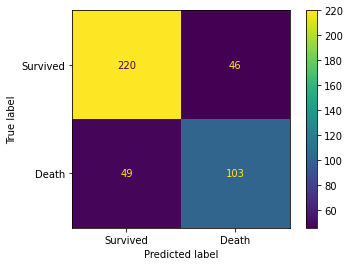

In [ ]:
cm = confusion_matrix(y_test, y_pred)

disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=target_names)
disp.plot();

In [ ]:
print(classification_report(y_test, y_pred, target_names=target_names, digits=3))

              precision    recall  f1-score   support

    Survived      0.818     0.827     0.822       266
       Death      0.691     0.678     0.684       152

    accuracy                          0.773       418
   macro avg      0.755     0.752     0.753       418
weighted avg      0.772     0.773     0.772       418



In [ ]:
temp[3] = [recall_score(y_test, y_pred, average=None)[0], 
           recall_score(y_test, y_pred, average=None)[1],
           recall_score(y_test, y_pred, average=None).sum(),
           accuracy_score(y_test, y_pred)]
temp

array([[0.8083, 0.6842, 1.4925, 0.7632],
       [0.8271, 0.6776, 1.5047, 0.7727],
       [0.8083, 0.6842, 1.4925, 0.7632],
       [0.8271, 0.6776, 1.5047, 0.7727]])

In [ ]:
Result.loc['NN-Scikit'] = temp
Result

recall_0  recall_1  recall_sum       acc
Logistic   Ig_im          0.984962  0.480263    1.465226  0.801435
           Ig_im_tun_z    0.890977  0.776316    1.667293  0.849282
           Deal_im        0.823308  0.861842    1.685150  0.837321
           Deal_im_tun_z  0.890977  0.776316    1.667293  0.849282
KNN        Ig_im          0.909774  0.289474    1.199248  0.684211
           Ig_im_tun_z    0.909774  0.289474    1.199248  0.684211
           Deal_im        0.635338  0.532895    1.168233  0.598086
           Deal_im_tun_z  0.488722  0.710526    1.199248  0.569378
GaussianNB Ig_im          0.161654  0.809211    0.970865  0.397129
           Ig_im_tun_z    0.161654  0.809211    0.970865  0.397129
           Deal_im        0.161654  0.809211    0.970865  0.397129
           Deal_im_tun_z  0.161654  0.809211    0.970865  0.397129
DT         Ig_im          0.992481  0.723684    1.716165  0.894737
           Ig_im_tun_z    1.000000  0.526316    1.526316  0.827751
           Deal_im        1.000000  1.000000    2.000000  1.000000
           Deal_im_tun_z  1.000000  1.000000    2.000000  1.000000
RF         Ig_im          0.917293  0.789474    1.706767  0.870813
           Ig_im_tun_z    0.984962  0.631579    1.616541  0.856459
           Deal_im        0.890977  0.802632    1.693609  0.858852
           Deal_im_tun_z  0.872180  0.822368    1.694549  0.854067
Bagging    Ig_im          0.932331  0.730263    1.662594  0.858852
           Ig_im_tun_z    0.962406  0.684211    1.646617  0.861244
           Deal_im        0.913534  0.756579    1.670113  0.856459
           Deal_im_tun_z  0.796992  0.861842    1.658835  0.820574
AdaBoost   Ig_im          0.939850  0.822368    1.762218  0.897129
           Ig_im_tun_z    0.992481  0.736842    1.729323  0.899522
           Deal_im        0.939850  0.822368    1.762218  0.897129
           Deal_im_tun_z  0.939850  0.822368    1.762218  0.897129
XGBBoost   Ig_im          0.996241  0.730263    1.726504  0.899522
           Ig_im_tun_z    0.973684  0.730263    1.703947  0.885167
           Deal_im        0.875940  0.855263    1.731203  0.868421
           Deal_im_tun_z  0.909774  0.789474    1.699248  0.866029
SVM        Ig_im          0.830827  0.723684    1.554511  0.791866
           Ig_im_tun_z    0.778195  0.815789    1.593985  0.791866
           Deal_im        0.808271  0.723684    1.531955  0.777512
           Deal_im_tun_z  0.751880  0.822368    1.574248  0.777512
NN-Scikit  Ig_im          0.808271  0.684211    1.492481  0.763158
           Ig_im_tun_z    0.827068  0.677632    1.504699  0.772727
           Deal_im        0.808271  0.684211    1.492481  0.763158
           Deal_im_tun_z  0.827068  0.677632    1.504699  0.772727
NN-TF      Ig_im          0.000000  0.000000    0.000000  0.000000
           Ig_im_tun_z    0.000000  0.000000    0.000000  0.000000
           Deal_im        0.000000  0.000000    0.000000  0.000000
           Deal_im_tun_z  0.000000  0.000000    0.000000  0.000000

## Neutral Network - Tensorflow Keras

In [ ]:
temp = np.zeros((4, 4))

#### Focus on accuracy

In [ ]:
model = keras.Sequential([
    layers.Dense(32, kernel_initializer='lecun_normal',
                 activation='selu'),
#    layers.AlphaDropout(0.05),                      
    layers.Dense(32, kernel_initializer='lecun_normal',
                 activation='selu'),
#   layers.AlphaDropout(0.05),
    layers.Dense(1, activation='sigmoid')
])

model.compile(optimizer='rmsprop',
              loss='binary_crossentropy',
              metrics=['accuracy'])


callbacks_list = [                                   
    keras.callbacks.EarlyStopping(                   
        monitor='val_loss',                          
        patience=5,                                  
    ),

    keras.callbacks.ReduceLROnPlateau(
        monitor='val_loss', 
        factor=0.5,
        patience=2, 
        min_lr=0.0001,
    ),

    keras.callbacks.ModelCheckpoint(                 
        filepath='Titanic.h5',               
        monitor='val_loss',                          
        save_best_only=True,                         
    )
]


history = model.fit(x_train_std,
                    y_train,
                    epochs=10000,
                    callbacks=callbacks_list,
                    batch_size=16,
                    validation_data=(x_val_std, y_val))

Epoch 1/10
45/45 [==============================] - 1s 18ms/step - loss: 0.6777 - accuracy: 0.6503 - val_loss: 0.5388 - val_accuracy: 0.6983 - lr: 0.0010
Epoch 2/10
45/45 [==============================] - 0s 4ms/step - loss: 0.4583 - accuracy: 0.7963 - val_loss: 0.4951 - val_accuracy: 0.7933 - lr: 0.0010
Epoch 3/10
45/45 [==============================] - 0s 3ms/step - loss: 0.3606 - accuracy: 0.8469 - val_loss: 0.5045 - val_accuracy: 0.7877 - lr: 0.0010
Epoch 4/10
45/45 [==============================] - 0s 3ms/step - loss: 0.2989 - accuracy: 0.8792 - val_loss: 0.5267 - val_accuracy: 0.7933 - lr: 0.0010
Epoch 5/10
45/45 [==============================] - 0s 4ms/step - loss: 0.2525 - accuracy: 0.9073 - val_loss: 0.5556 - val_accuracy: 0.7877 - lr: 5.0000e-04
Epoch 6/10
45/45 [==============================] - 0s 3ms/step - loss: 0.2387 - accuracy: 0.9087 - val_loss: 0.5802 - val_accuracy: 0.7877 - lr: 5.0000e-04
Epoch 7/10
45/45 [==============================] - 0s 4ms/step - loss: 0

In [ ]:
pd.DataFrame(history.history)

,loss,accuracy,val_loss,val_accuracy,lr
0,0.677689,0.650281,0.538801,0.698324,0.00100
1,0.458257,0.796348,0.495124,0.793296,0.00100
2,0.360592,0.846910,0.504478,0.787709,0.00100
3,0.298945,0.879214,0.526695,0.793296,0.00100
4,0.252499,0.907303,0.555578,0.787709,0.00050
5,0.238717,0.908708,0.580215,0.787709,0.00050
6,0.220359,0.917135,0.594276,0.787709,0.00025


In [ ]:
plt.style.use('seaborn')

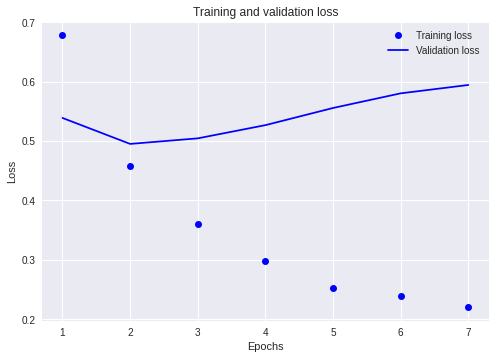

In [ ]:
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(loss) + 1)

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')

plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend();

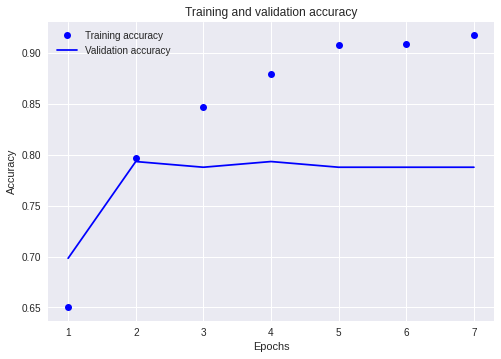

In [ ]:
plt.clf()

acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

plt.plot(epochs, acc, 'bo', label='Training accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation accuracy')

plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend();

In [ ]:
model = keras.models.load_model('Titanic.h5')

In [ ]:
predictions = model.predict(x_test_std)  
y_pred = np.where(predictions > 0.5, 1, 0)

cm = confusion_matrix(y_test, y_pred)
cm

array([[222,  44],
       [ 39, 113]])

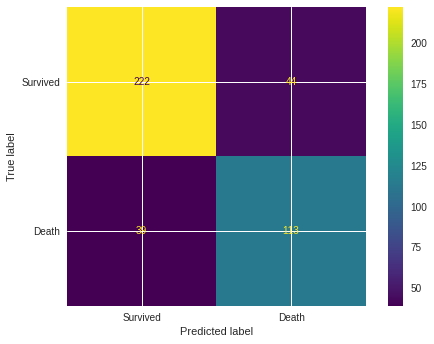

In [ ]:
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=target_names)
disp.plot();

In [ ]:
print(classification_report(y_test, y_pred, target_names=target_names, digits=3))

              precision    recall  f1-score   support

    Survived      0.851     0.835     0.843       266
       Death      0.720     0.743     0.731       152

    accuracy                          0.801       418
   macro avg      0.785     0.789     0.787       418
weighted avg      0.803     0.801     0.802       418



In [ ]:
temp[0] = [recall_score(y_test, y_pred, average=None)[0], 
           recall_score(y_test, y_pred, average=None)[1],
           recall_score(y_test, y_pred, average=None).sum(),
           accuracy_score(y_test, y_pred)]
temp

array([[0.8346, 0.7434, 1.578 , 0.8014],
       [0.    , 0.    , 0.    , 0.    ],
       [0.    , 0.    , 0.    , 0.    ],
       [0.    , 0.    , 0.    , 0.    ]])

#### Focus on accuracy by tuning z

In [ ]:
c1 = []

for z in range(zstep, 100, zstep):                  
    y_pred = np.where(model.predict(x_val_std) > z / 100, 1, 0) 

    if z % 10 == 0:
        print(f'The score for z = {z / 100:.2f} is {accuracy_score(y_val, y_pred):.6f}.')
        
    c1.append(accuracy_score(y_val, y_pred))
    
print()

c2 = np.argmax(c1)
print(f'The proper z is {(c2 * zstep + zstep) / 100}.')

The score for z = 0.10 is 0.648045.
The score for z = 0.20 is 0.737430.
The score for z = 0.30 is 0.770950.
The score for z = 0.40 is 0.782123.
The score for z = 0.50 is 0.787709.
The score for z = 0.60 is 0.793296.
The score for z = 0.70 is 0.765363.
The score for z = 0.80 is 0.731844.
The score for z = 0.90 is 0.720670.

The proper z is 0.61.


In [ ]:
predictions = model.predict(x_test_std)  
y_pred = np.where(predictions > ((c2 * zstep + zstep) / 100), 1, 0)

cm = confusion_matrix(y_test, y_pred)
cm

array([[230,  36],
       [ 45, 107]])

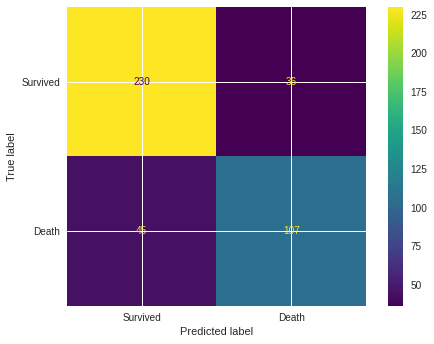

In [ ]:
cm = confusion_matrix(y_test, y_pred)

disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=target_names)
disp.plot();

In [ ]:
print(classification_report(y_test, y_pred, target_names=target_names, digits=3))

              precision    recall  f1-score   support

    Survived      0.836     0.865     0.850       266
       Death      0.748     0.704     0.725       152

    accuracy                          0.806       418
   macro avg      0.792     0.784     0.788       418
weighted avg      0.804     0.806     0.805       418



In [ ]:
temp[1] = [recall_score(y_test, y_pred, average=None)[0], 
           recall_score(y_test, y_pred, average=None)[1],
           recall_score(y_test, y_pred, average=None).sum(),
           accuracy_score(y_test, y_pred)]
temp

array([[0.8346, 0.7434, 1.578 , 0.8014],
       [0.8647, 0.7039, 1.5686, 0.8062],
       [0.    , 0.    , 0.    , 0.    ],
       [0.    , 0.    , 0.    , 0.    ]])

#### Focus on recall

In [ ]:
class_weights = class_weight.compute_class_weight(class_weight = 'balanced', 
                                                  classes = np.unique(y_train), 
                                                  y = y_train)
class_weights = dict(enumerate(class_weights))
class_weights

{0: 0.827906976744186, 1: 1.2624113475177305}

In [ ]:
model = keras.Sequential([
    layers.Dense(32, kernel_initializer='lecun_normal',
                 activation='selu'),
#    layers.AlphaDropout(0.05),                      
    layers.Dense(32, kernel_initializer='lecun_normal',
                 activation='selu'),
#    layers.AlphaDropout(0.05),
    layers.Dense(1, activation='sigmoid')
])

model.compile(optimizer='rmsprop',
              loss='binary_crossentropy',
              metrics=['accuracy',
                       keras.metrics.Recall(name='Recall_1')])


callbacks_list = [                                   
    keras.callbacks.EarlyStopping(                   
        monitor='val_Recall_1',                          
        patience=5, 
        mode='max',                                         
    ),

    keras.callbacks.ReduceLROnPlateau(
        monitor='val_loss', 
        factor=0.5,
        patience=2, 
        min_lr=0.0001
    ),

        keras.callbacks.ModelCheckpoint(                 
        filepath='Titanic_Balance.h5',               
        monitor='val_Recall_1',
        mode='max',                          
        save_best_only=True,                      
    )
]


history = model.fit(x_train_std,
                    y_train,
                    epochs=10000,
                    callbacks=callbacks_list,
                    batch_size=16,
                    validation_data=(x_val_std, y_val),
                    class_weight=class_weights)

Epoch 1/10
45/45 [==============================] - 3s 27ms/step - loss: 0.6810 - accuracy: 0.6194 - Recall_1: 0.6454 - val_loss: 0.5120 - val_accuracy: 0.7598 - val_Recall_1: 0.7000 - lr: 0.0010
Epoch 2/10
45/45 [==============================] - 0s 7ms/step - loss: 0.4593 - accuracy: 0.7949 - Recall_1: 0.7660 - val_loss: 0.5140 - val_accuracy: 0.7430 - val_Recall_1: 0.7833 - lr: 0.0010
Epoch 3/10
45/45 [==============================] - 0s 7ms/step - loss: 0.3707 - accuracy: 0.8455 - Recall_1: 0.8475 - val_loss: 0.5320 - val_accuracy: 0.7654 - val_Recall_1: 0.8000 - lr: 0.0010
Epoch 4/10
45/45 [==============================] - 0s 5ms/step - loss: 0.3046 - accuracy: 0.8764 - Recall_1: 0.8759 - val_loss: 0.5582 - val_accuracy: 0.7542 - val_Recall_1: 0.7833 - lr: 5.0000e-04
Epoch 5/10
45/45 [==============================] - 0s 6ms/step - loss: 0.2812 - accuracy: 0.8820 - Recall_1: 0.8865 - val_loss: 0.5731 - val_accuracy: 0.7765 - val_Recall_1: 0.7667 - lr: 5.0000e-04
Epoch 6/10
45/45

In [ ]:
pd.DataFrame(history.history)

,loss,accuracy,Recall_1,val_loss,val_accuracy,val_Recall_1,lr
0,0.681015,0.619382,0.645390,0.511999,0.759777,0.700000,0.001000
1,0.459325,0.794944,0.765957,0.514046,0.743017,0.783333,0.001000
2,0.370738,0.845506,0.847518,0.532033,0.765363,0.800000,0.001000
3,0.304575,0.876405,0.875886,0.558222,0.754190,0.783333,0.000500
4,0.281187,0.882023,0.886525,0.573140,0.776536,0.766667,0.000500
5,0.257145,0.894663,0.886525,0.588682,0.776536,0.766667,0.000250
6,0.249459,0.896067,0.882979,0.602757,0.770950,0.766667,0.000250
7,0.238480,0.904494,0.893617,0.610724,0.765363,0.750000,0.000125


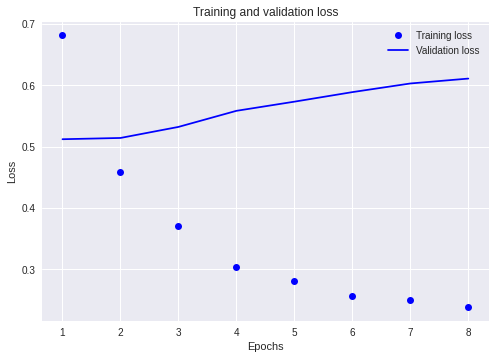

In [ ]:
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(loss) + 1)

plt.figsize = (10, 6)
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')

plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend();

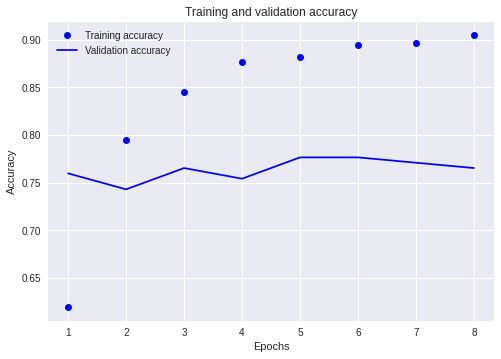

In [ ]:
plt.clf()

acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

plt.plot(epochs, acc, 'bo', label='Training accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation accuracy')

plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend();

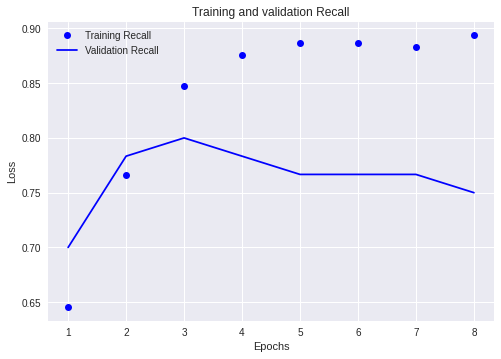

In [ ]:
loss = history.history['Recall_1']
val_loss = history.history['val_Recall_1']

epochs = range(1, len(loss) + 1)

plt.figsize = (10, 6)
plt.plot(epochs, loss, 'bo', label='Training Recall')
plt.plot(epochs, val_loss, 'b', label='Validation Recall')

plt.title('Training and validation Recall')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend();

In [ ]:
model = keras.models.load_model('Titanic_Balance.h5')

In [ ]:
predictions = model.predict(x_test_std)  
y_pred = np.where(predictions > 0.5, 1, 0)

cm = confusion_matrix(y_test, y_pred)
cm

array([[213,  53],
       [ 31, 121]])

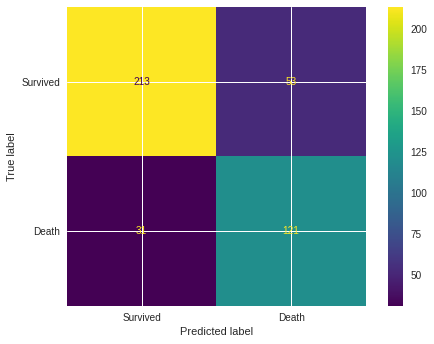

In [ ]:
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=target_names)
disp.plot();

In [ ]:
print(classification_report(y_test, y_pred, target_names=target_names, digits=3))

              precision    recall  f1-score   support

    Survived      0.873     0.801     0.835       266
       Death      0.695     0.796     0.742       152

    accuracy                          0.799       418
   macro avg      0.784     0.798     0.789       418
weighted avg      0.808     0.799     0.801       418



In [ ]:
temp[2] = [recall_score(y_test, y_pred, average=None)[0], 
           recall_score(y_test, y_pred, average=None)[1],
           recall_score(y_test, y_pred, average=None).sum(),
           accuracy_score(y_test, y_pred)]
temp

array([[0.8346, 0.7434, 1.578 , 0.8014],
       [0.8647, 0.7039, 1.5686, 0.8062],
       [0.8008, 0.7961, 1.5968, 0.799 ],
       [0.    , 0.    , 0.    , 0.    ]])

#### Focus on recall by tuning z

In [ ]:
c1 = []

for z in range(zstep, 100, zstep):                  
    y_pred = np.where(model.predict(x_val_std) > z / 100, 1, 0)
    recall = recall_score(y_val, y_pred, average=None).sum() 

    if z % 10 == 0:
        print(f'The recall for z = {z / 100:.2f} is {recall:.6f}.')
        
    c1.append(recall)
    
print()

c2 = np.argmax(c1)
print(f'The proper z is {(c2 * zstep + zstep) / 100}.')

The recall for z = 0.10 is 1.311905.
The recall for z = 0.20 is 1.480252.
The recall for z = 0.30 is 1.505602.
The recall for z = 0.40 is 1.497619.
The recall for z = 0.50 is 1.523109.
The recall for z = 0.60 is 1.556723.
The recall for z = 0.70 is 1.532073.
The recall for z = 0.80 is 1.448739.
The recall for z = 0.90 is 1.340756.

The proper z is 0.67.


In [ ]:
predictions = model.predict(x_test_std)  
y_pred = np.where(predictions > ((c2 * zstep + zstep) / 100), 1, 0)

cm = confusion_matrix(y_test, y_pred)
cm

array([[227,  39],
       [ 40, 112]])

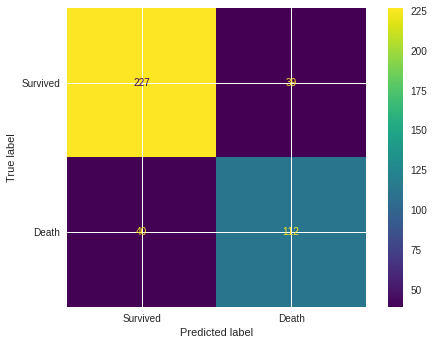

In [ ]:
cm = confusion_matrix(y_test, y_pred)

disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=target_names)
disp.plot();

In [ ]:
print(classification_report(y_test, y_pred, target_names=target_names, digits=3))

              precision    recall  f1-score   support

    Survived      0.850     0.853     0.852       266
       Death      0.742     0.737     0.739       152

    accuracy                          0.811       418
   macro avg      0.796     0.795     0.796       418
weighted avg      0.811     0.811     0.811       418



In [ ]:
temp[3] = [recall_score(y_test, y_pred, average=None)[0], 
           recall_score(y_test, y_pred, average=None)[1],
           recall_score(y_test, y_pred, average=None).sum(),
           accuracy_score(y_test, y_pred)]
temp

array([[0.8346, 0.7434, 1.578 , 0.8014],
       [0.8647, 0.7039, 1.5686, 0.8062],
       [0.8008, 0.7961, 1.5968, 0.799 ],
       [0.8534, 0.7368, 1.5902, 0.811 ]])

In [ ]:
Result.loc['NN-TF'] = temp
Result

recall_0  recall_1  recall_sum       acc
Logistic   Ig_im          0.984962  0.480263    1.465226  0.801435
           Ig_im_tun_z    0.890977  0.776316    1.667293  0.849282
           Deal_im        0.823308  0.861842    1.685150  0.837321
           Deal_im_tun_z  0.890977  0.776316    1.667293  0.849282
KNN        Ig_im          0.909774  0.289474    1.199248  0.684211
           Ig_im_tun_z    0.909774  0.289474    1.199248  0.684211
           Deal_im        0.635338  0.532895    1.168233  0.598086
           Deal_im_tun_z  0.488722  0.710526    1.199248  0.569378
GaussianNB Ig_im          0.161654  0.809211    0.970865  0.397129
           Ig_im_tun_z    0.161654  0.809211    0.970865  0.397129
           Deal_im        0.161654  0.809211    0.970865  0.397129
           Deal_im_tun_z  0.161654  0.809211    0.970865  0.397129
DT         Ig_im          0.992481  0.723684    1.716165  0.894737
           Ig_im_tun_z    1.000000  0.526316    1.526316  0.827751
           Deal_im        1.000000  1.000000    2.000000  1.000000
           Deal_im_tun_z  1.000000  1.000000    2.000000  1.000000
RF         Ig_im          0.917293  0.789474    1.706767  0.870813
           Ig_im_tun_z    0.984962  0.631579    1.616541  0.856459
           Deal_im        0.890977  0.802632    1.693609  0.858852
           Deal_im_tun_z  0.872180  0.822368    1.694549  0.854067
Bagging    Ig_im          0.932331  0.730263    1.662594  0.858852
           Ig_im_tun_z    0.962406  0.684211    1.646617  0.861244
           Deal_im        0.913534  0.756579    1.670113  0.856459
           Deal_im_tun_z  0.796992  0.861842    1.658835  0.820574
AdaBoost   Ig_im          0.939850  0.822368    1.762218  0.897129
           Ig_im_tun_z    0.992481  0.736842    1.729323  0.899522
           Deal_im        0.939850  0.822368    1.762218  0.897129
           Deal_im_tun_z  0.939850  0.822368    1.762218  0.897129
XGBBoost   Ig_im          0.996241  0.730263    1.726504  0.899522
           Ig_im_tun_z    0.973684  0.730263    1.703947  0.885167
           Deal_im        0.875940  0.855263    1.731203  0.868421
           Deal_im_tun_z  0.909774  0.789474    1.699248  0.866029
SVM        Ig_im          0.830827  0.723684    1.554511  0.791866
           Ig_im_tun_z    0.778195  0.815789    1.593985  0.791866
           Deal_im        0.808271  0.723684    1.531955  0.777512
           Deal_im_tun_z  0.751880  0.822368    1.574248  0.777512
NN-Scikit  Ig_im          0.808271  0.684211    1.492481  0.763158
           Ig_im_tun_z    0.827068  0.677632    1.504699  0.772727
           Deal_im        0.808271  0.684211    1.492481  0.763158
           Deal_im_tun_z  0.827068  0.677632    1.504699  0.772727
NN-TF      Ig_im          0.834586  0.743421    1.578008  0.801435
           Ig_im_tun_z    0.864662  0.703947    1.568609  0.806220
           Deal_im        0.800752  0.796053    1.596805  0.799043
           Deal_im_tun_z  0.853383  0.736842    1.590226  0.811005

In [ ]:
Result.to_csv('Result.csv')